**Netflix Bussiness Case**




Ques 1. Defining Problem Statement and Analysing basic metrics (10 Points)

---



Ans:
  a) **Problem Statement:**

*   Which type of shows to produce in Netflix and how to grow the business.
*   The company is looking for data-driven insights.
*   How has the number of movies released per year changed over the last 20-30 years?
*   Comparison of tv shows vs. movies.
*   What is the best time to launch a TV show?
*   Analysis of actors/directors of different types of shows/movies.
*   Does Netflix has more focus on TV Shows than movies in recent years.
*   Understanding what content is available in different countries






In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


dataFileObj = pd.read_csv('netflix.csv')

df = pd.DataFrame(dataFileObj)
df

show_id     type                  title         director  \
0         s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1         s2  TV Show          Blood & Water              NaN   
2         s3  TV Show              Ganglands  Julien Leclercq   
3         s4  TV Show  Jailbirds New Orleans              NaN   
4         s5  TV Show           Kota Factory              NaN   
...      ...      ...                    ...              ...   
8802   s8803    Movie                 Zodiac    David Fincher   
8803   s8804  TV Show            Zombie Dumb              NaN   
8804   s8805    Movie             Zombieland  Ruben Fleischer   
8805   s8806    Movie                   Zoom     Peter Hewitt   
8806   s8807    Movie                 Zubaan      Mozez Singh   

                                                   cast        country  \
0                                                   NaN  United States   
1     Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2     Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                   NaN            NaN   
4     Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   
...                                                 ...            ...   
8802  Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...  United States   
8803                                                NaN            NaN   
8804  Jesse Eisenberg, Woody Harrelson, Emma Stone, ...  United States   
8805  Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...  United States   
8806  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...          India   

              date_added  release_year rating   duration  \
0     September 25, 2021          2020  PG-13     90 min   
1     September 24, 2021          2021  TV-MA  2 Seasons   
2     September 24, 2021          2021  TV-MA   1 Season   
3     September 24, 2021          2021  TV-MA   1 Season   
4     September 24, 2021          2021  TV-MA  2 Seasons   
...                  ...           ...    ...        ...   
8802   November 20, 2019          2007      R    158 min   
8803        July 1, 2019          2018  TV-Y7  2 Seasons   
8804    November 1, 2019          2009      R     88 min   
8805    January 11, 2020          2006     PG     88 min   
8806       March 2, 2019          2015  TV-14    111 min   

                                              listed_in  \
0                                         Documentaries   
1       International TV Shows, TV Dramas, TV Mysteries   
2     Crime TV Shows, International TV Shows, TV Act...   
3                                Docuseries, Reality TV   
4     International TV Shows, Romantic TV Shows, TV ...   
...                                                 ...   
8802                     Cult Movies, Dramas, Thrillers   
8803             Kids' TV, Korean TV Shows, TV Comedies   
8804                            Comedies, Horror Movies   
8805                 Children & Family Movies, Comedies   
8806     Dramas, International Movies, Music & Musicals   

                                            description  
0     As her father nears the end of his life, filmm...  
1     After crossing paths at a party, a Cape Town t...  
2     To protect his family from a powerful drug lor...  
3     Feuds, flirtations and toilet talk go down amo...  
4     In a city of coaching centers known to train I...  
...                                                 ...  
8802  A political cartoonist, a crime reporter and a...  
8803  While living alone in a spooky town, a young g...  
8804  Looking to survive in a world taken over by zo...  
8805  Dragged from civilian life, a former superhero...  
8806  A scrappy but poor boy worms his way into a ty...  

[8807 rows x 12 columns]

In [ ]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [ ]:
#checking datatypes
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [ ]:
#number of unique values in our data
for i in df.columns:
  print(i,':',df[i].nunique())

show_id : 8807
type : 2
title : 8807
director : 4528
cast : 7692
country : 748
date_added : 1767
release_year : 74
rating : 17
duration : 220
listed_in : 514
description : 8775


In [ ]:

#checking the occurences of each of the ratings
df['rating'].value_counts()

rating
TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: count, dtype: int64

In [ ]:
df.dropna(inplace = True)
df['cast'].fillna('Unknown Actor', inplace = True)
df['cast'] = df['cast'].apply(lambda x:x.split(', '))
df['director'].fillna('Unknown Director', inplace = True)
df['director'] = df['director'].apply(lambda x:x.split(', '))
df['listed_in'].fillna('Unknown Listing', inplace = True)
df['listed_in'] = df['listed_in'].apply(lambda x:x.split(', '))
df['country'].fillna('Unknown Country', inplace = True)
df['country'] = df['country'].apply(lambda x:x.split(', '))
df['date_added'] = pd.to_datetime(df['date_added'], format='mixed')

df = df.explode('cast')
df = df.explode('listed_in')
df = df.explode('country')
df = df.explode('director')
df

show_id   type    title      director                   cast  \
7         s8  Movie  Sankofa  Haile Gerima           Kofi Ghanaba   
7         s8  Movie  Sankofa  Haile Gerima           Kofi Ghanaba   
7         s8  Movie  Sankofa  Haile Gerima           Kofi Ghanaba   
7         s8  Movie  Sankofa  Haile Gerima           Kofi Ghanaba   
7         s8  Movie  Sankofa  Haile Gerima           Kofi Ghanaba   
...      ...    ...      ...           ...                    ...   
8806   s8807  Movie   Zubaan   Mozez Singh         Anita Shabdish   
8806   s8807  Movie   Zubaan   Mozez Singh         Anita Shabdish   
8806   s8807  Movie   Zubaan   Mozez Singh  Chittaranjan Tripathy   
8806   s8807  Movie   Zubaan   Mozez Singh  Chittaranjan Tripathy   
8806   s8807  Movie   Zubaan   Mozez Singh  Chittaranjan Tripathy   

             country date_added  release_year rating duration  \
7      United States 2021-09-24          1993  TV-MA  125 min   
7              Ghana 2021-09-24          1993  TV-MA  125 min   
7       Burkina Faso 2021-09-24          1993  TV-MA  125 min   
7     United Kingdom 2021-09-24          1993  TV-MA  125 min   
7            Germany 2021-09-24          1993  TV-MA  125 min   
...              ...        ...           ...    ...      ...   
8806           India 2019-03-02          2015  TV-14  111 min   
8806           India 2019-03-02          2015  TV-14  111 min   
8806           India 2019-03-02          2015  TV-14  111 min   
8806           India 2019-03-02          2015  TV-14  111 min   
8806           India 2019-03-02          2015  TV-14  111 min   

                 listed_in                                        description  
7                   Dramas  On a photo shoot in Ghana, an American model s...  
7                   Dramas  On a photo shoot in Ghana, an American model s...  
7                   Dramas  On a photo shoot in Ghana, an American model s...  
7                   Dramas  On a photo shoot in Ghana, an American model s...  
7                   Dramas  On a photo shoot in Ghana, an American model s...  
...                    ...                                                ...  
8806  International Movies  A scrappy but poor boy worms his way into a ty...  
8806      Music & Musicals  A scrappy but poor boy worms his way into a ty...  
8806                Dramas  A scrappy but poor boy worms his way into a ty...  
8806  International Movies  A scrappy but poor boy worms his way into a ty...  
8806      Music & Musicals  A scrappy but poor boy worms his way into a ty...  

[143092 rows x 12 columns]

In [ ]:
df.describe()

date_added   release_year
count                         143092  143092.000000
mean   2019-06-02 05:19:53.223939840    2012.164524
min              2008-01-01 00:00:00    1942.000000
25%              2018-06-26 00:00:00    2010.000000
50%              2019-08-06 00:00:00    2016.000000
75%              2020-07-24 00:00:00    2018.000000
max              2021-09-24 00:00:00    2021.000000
std                              NaN       9.694476

In [ ]:
min(df['date_added']) #First Movie/Series Date in this Dataset

Timestamp('2008-01-01 00:00:00')

In [ ]:
max(df['date_added']) #Last Movie/Series Date in this Dataset

Timestamp('2021-09-24 00:00:00')

In [ ]:
print(df.loc[: ,'type'].unique()) #Streaming content types

['Movie' 'TV Show']


In [ ]:
countries = [i for i in df['country'].unique() if i != 'Unknown Country' and i != ''] #Total Unique Countries from where Movies/Series produced
countries = sorted(countries)
c = 0
print('List of All countries\n')
for i in countries:
  print(i, end=", ")
  c=c+1
  if c == 10:
    print('\n')
    c=0

List of All countries

Afghanistan, Albania, Algeria, Angola, Argentina, Australia, Austria, Bahamas, Bangladesh, Belgium, 

Bermuda, Brazil, Bulgaria, Burkina Faso, Cambodia, Cambodia,, Cameroon, Canada, Cayman Islands, Chile, 

China, Colombia, Croatia, Czech Republic, Denmark, Dominican Republic, East Germany, Ecuador, Egypt, Ethiopia, 

Finland, France, Georgia, Germany, Ghana, Greece, Guatemala, Hong Kong, Hungary, Iceland, 

India, Indonesia, Iran, Iraq, Ireland, Israel, Italy, Jamaica, Japan, Jordan, 

Kenya, Kuwait, Latvia, Lebanon, Liechtenstein, Lithuania, Luxembourg, Malawi, Malaysia, Malta, 

Mauritius, Mexico, Montenegro, Morocco, Mozambique, Namibia, Nepal, Netherlands, New Zealand, Nicaragua, 

Nigeria, Norway, Pakistan, Panama, Paraguay, Peru, Philippines, Poland, Poland,, Portugal, 

Qatar, Romania, Russia, Saudi Arabia, Senegal, Serbia, Singapore, Slovakia, Slovenia, Somalia, 

South Africa, South Korea, Soviet Union, Spain, Sri Lanka, Sudan, Sweden, Switzerland, Syri

In [ ]:
len(countries) #List of Unique Countries from where Movies/Series produced

112

In [ ]:
df['director'].value_counts().head(10)


director
Martin Scorsese        419
Youssef Chahine        409
Cathy Garcia-Molina    356
Steven Spielberg       355
Lars von Trier         336
Raja Gosnell           308
Tom Hooper             306
McG                    293
David Dhawan           270
Wilson Yip             260
Name: count, dtype: int64

In [ ]:
df['director'].value_counts().tail(10)

director
Jonathan Taylor            1
Rebecca Harrell Tickell    1
Jon Rudberg                1
Sebastian DiNatale         1
Fazila Allana              1
Eric Abrams                1
Richard Miron              1
Thomas Toby Parkinson      1
Doesjka van Hoogdalem      1
Jeff Margolis              1
Name: count, dtype: int64

In [ ]:
df['type'].value_counts()

type
Movie      137532
TV Show      5560
Name: count, dtype: int64

In [ ]:
df['cast'].value_counts()

cast
Liam Neeson         161
Alfred Molina       154
John Krasinski      138
Salma Hayek         130
Frank Langella      128
                   ... 
Tyler Nathan          1
Dylan Schombing       1
Meesha Contreras      1
Zoe Hatz              1
Anish Jethmalani      1
Name: count, Length: 25458, dtype: int64

In [ ]:
df['country'].value_counts()

country
United States     45770
India             21762
United Kingdom     8992
France             6816
Canada             5793
                  ...  
Vatican City          3
Afghanistan           2
Sri Lanka             2
Panama                2
Nicaragua             1
Name: count, Length: 113, dtype: int64

In [ ]:
df['added_year'] = df['date_added'].apply(lambda x:str(x).split('-')[0])
# df['added_month'] = df['date_added'].apply(lambda x:str(x).split('-')[1])

                count
country              
United States    2444
India             932
United Kingdom    461
Canada            287
France            285
Germany           165
Spain             152
Japan             113
China             107
Egypt              99


<Axes: xlabel='country'>

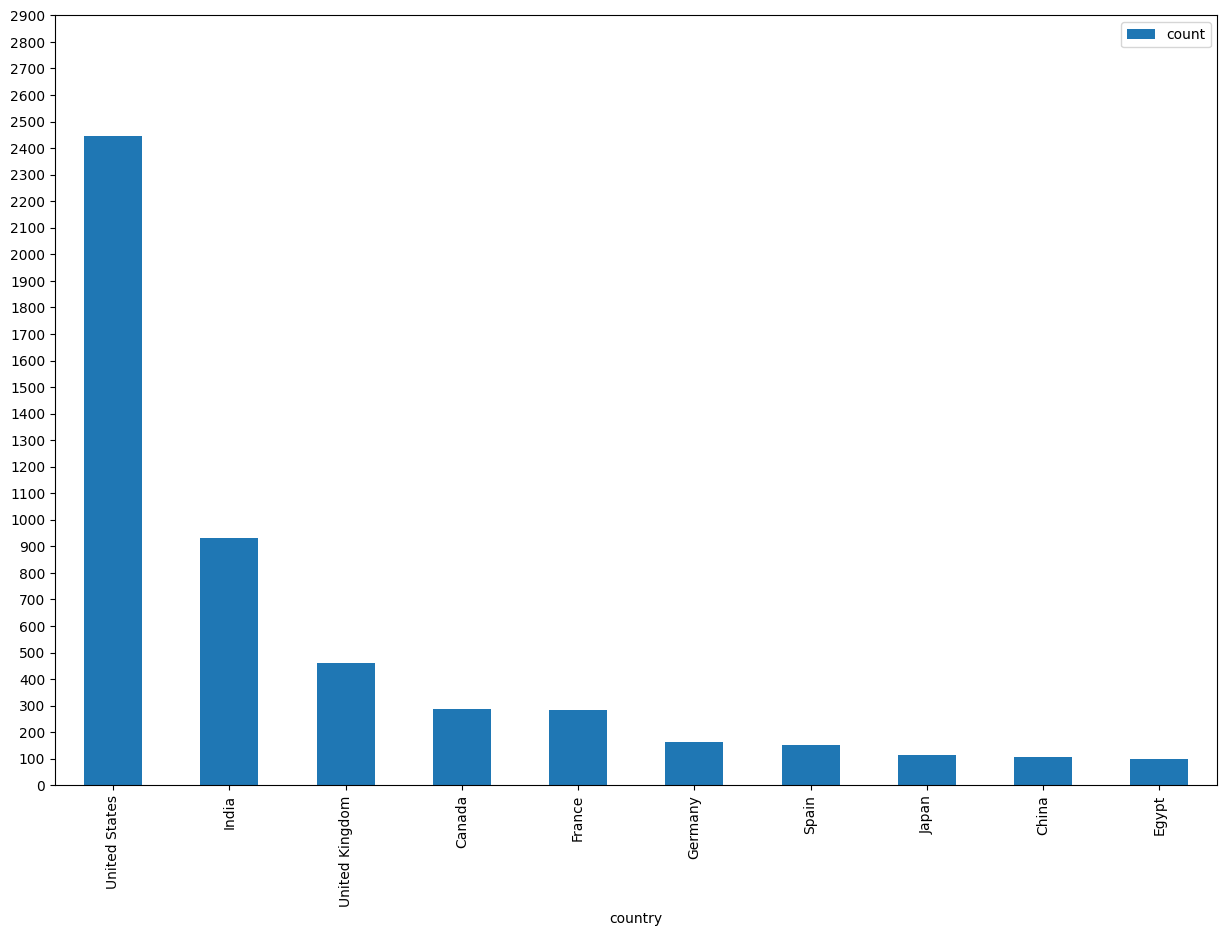

In [ ]:
# 2a) movies produced in each country and pick the top 10 countries.

Movie_country = df.loc[df['type'] == 'Movie', ['country', 'show_id']]
Movie_country.drop_duplicates(inplace = True)
grouped_mc = Movie_country.groupby('country').count().rename(columns = {'show_id':'count'})
print(grouped_mc.sort_values(by='count', ascending=False).head(10))

mcdf = Movie_country.groupby('country')[['show_id']].count()
# print(mcdf)
mcdf.rename(columns={"show_id": "count"}, inplace = True)
mcdf
final_df = Movie_country.join(mcdf, on = 'country')
final_df = final_df.loc[:, ['country', 'count']]
final_df.drop_duplicates(inplace = True)
final_df.sort_values('count', ascending=False, inplace=True)
final_df.head(10).plot(x="country", y="count", kind="bar", yticks=[i for i in range(0,3000,100)], figsize=(15, 10))

                count
country              
United States      41
United Kingdom     23
South Korea        12
Japan              11
Spain               9
India               8
Canada              8
France              8
Taiwan              8
Italy               5


<Axes: xlabel='country'>

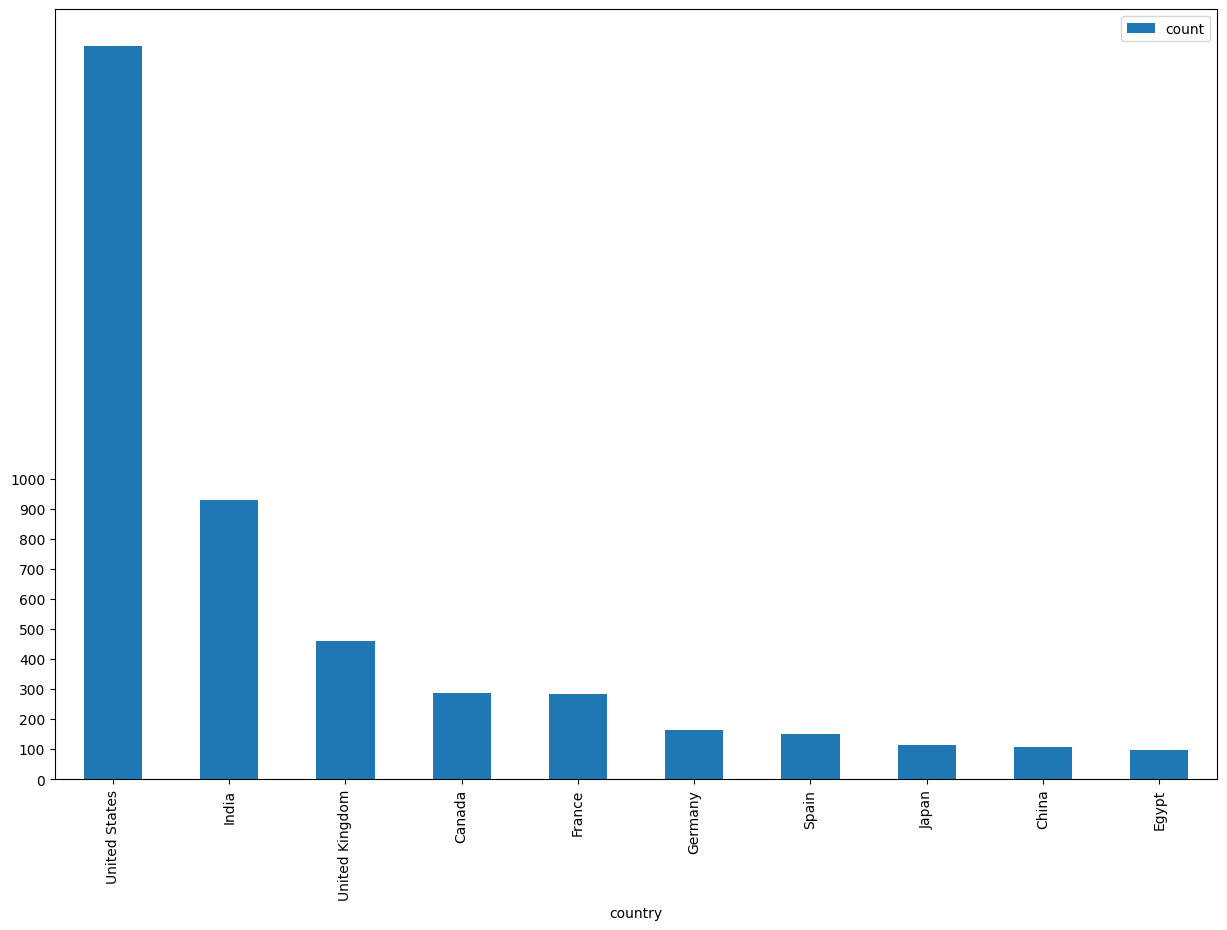

In [ ]:
# 2b) movies produced in each country and pick the top 10 countries.
TV_country = df.loc[df['type'] == 'TV Show', ['country', 'show_id']]
TV_country.drop_duplicates(inplace = True)
grouped_tc = TV_country.groupby('country').count().rename(columns = {'show_id':'count'})
print(grouped_tc.sort_values(by='count', ascending=False).head(10))

tcdf = Movie_country.groupby('country')[['show_id']].count()
# print(mcdf)
tcdf.rename(columns={"show_id": "count"}, inplace = True)
final_df = Movie_country.join(tcdf, on = 'country')
final_df = final_df.loc[:, ['country', 'count']]
final_df.drop_duplicates(inplace = True)
final_df.sort_values('count', ascending=False, inplace=True)
final_df.head(10).plot(x="country", y="count", kind="bar", yticks=[i for i in range(0,1001,100)], figsize=(15, 10))

      count
week       
13        9
27        6
51        6
24        5
5         5
7         5
32        5
44        5
34        5
15        5 




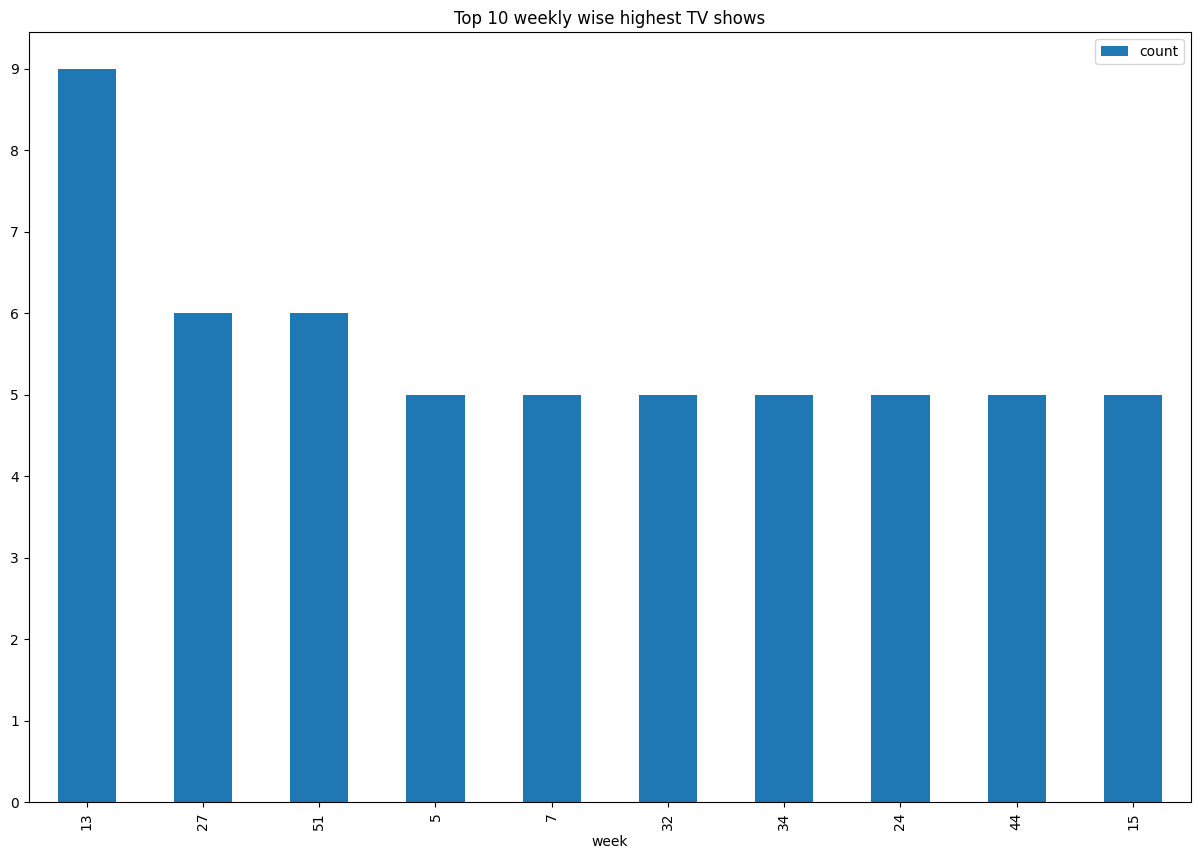

In [ ]:
df['week'] = df['date_added'].dt.isocalendar().week
weekTvShowdf = df.loc[df['type'] == 'TV Show', ['show_id', 'week']]
weekTvShowdf = weekTvShowdf[weekTvShowdf['week'].isna() != True]
weekTvShowdf.drop_duplicates(inplace = True)
groupedwtvdf = weekTvShowdf.groupby('week').count().rename(columns = {'show_id':'count'})
groupedwtvdf.sort_values(by='count', inplace=True, ascending = False)
print(groupedwtvdf.head(10),'\n\n')
final_df = weekTvShowdf.join(groupedwtvdf, on = 'week')
# final_df
final_df = final_df.loc[:,['week','count'] ]
final_df.drop_duplicates(inplace=True)
final_df.sort_values(by='count', inplace=True, ascending = False)
final_df.head(10).plot(x="week", y="count", kind="bar",
                       yticks=[i for i in range(0,10,1)], figsize=(15, 10), title='Top 10 weekly wise highest TV shows')
plt.show()

      count
week       
1       286
44      217
40      192
9       180
35      166
26      165
31      163
18      150
13      146
27      127 




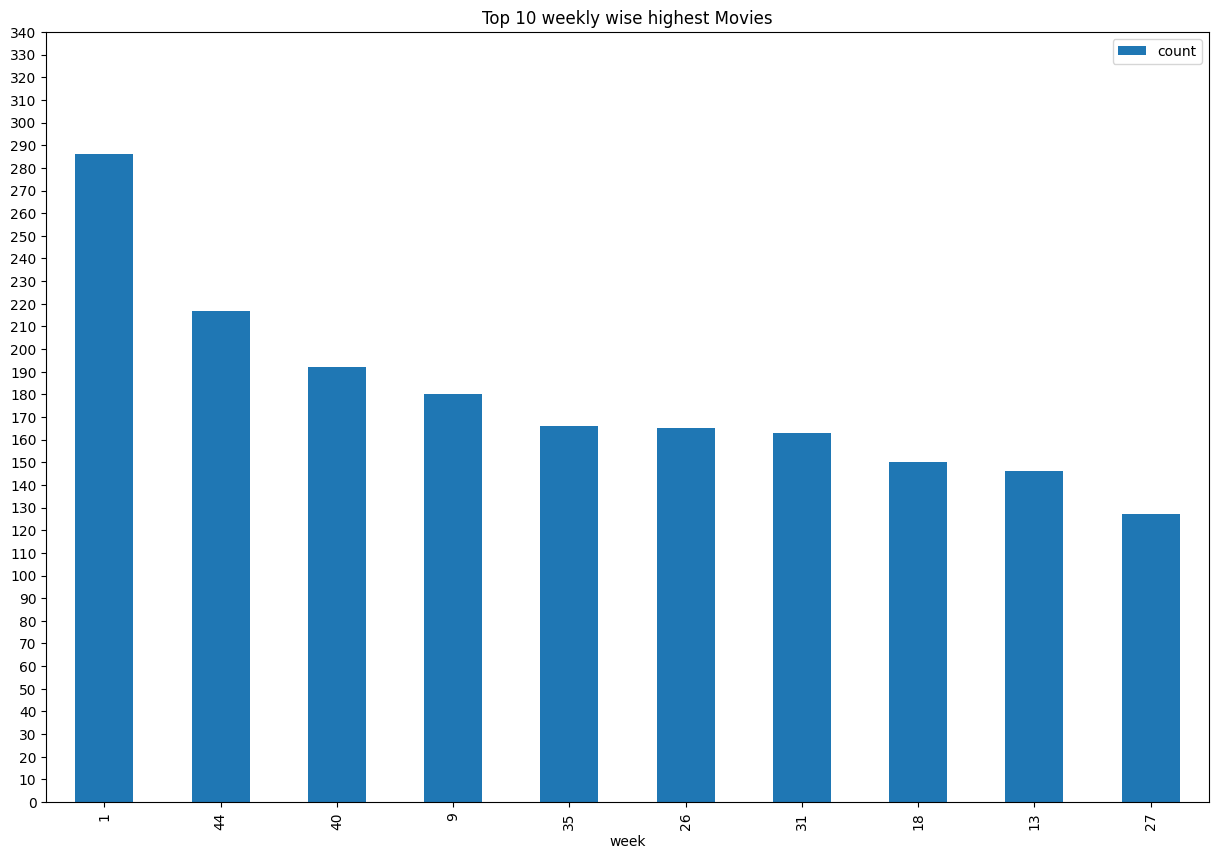

In [ ]:
weekMoviedf = df.loc[df['type'] == 'Movie', ['show_id', 'week']]
weekMoviedf = weekMoviedf[weekMoviedf['week'].isna() != True]
weekMoviedf.drop_duplicates(inplace = True)
groupedwmdf = weekMoviedf.groupby('week').count().rename(columns = {'show_id':'count'})
groupedwmdf.sort_values(by='count', inplace=True, ascending = False)
print(groupedwmdf.head(10),'\n\n')
final_df = weekTvShowdf.join(groupedwmdf, on = 'week')
# final_df
final_df = final_df.loc[:,['week','count'] ]
final_df.drop_duplicates(inplace=True)
final_df.sort_values(by='count', inplace=True, ascending = False)
final_df.head(10).plot(x="week", y="count", kind="bar",
                       yticks=[i for i in range(0,350,10)], figsize=(15, 10), title='Top 10 weekly wise highest Movies')
plt.show()

Questions:

Evaluation Criteria (100 Points):

1. Defining Problem Statement and Analysing basic metrics (10 Points)

2. Observations on the shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required), missing value detection, statistical summary (10 Points)

3. Non-Graphical Analysis: Value counts and unique attributes ​​(10 Points)

4. Visual Analysis - Univariate, Bivariate after pre-processing of the data

Note: Pre-processing involves unnesting of the data in columns like Actor, Director, Country

4.1 For continuous variable(s): Distplot, countplot, histogram for univariate analysis (10 Points)

4.2 For categorical variable(s): Boxplot (10 Points)

4.3 For correlation: Heatmaps, Pairplots (10 Points)

5. Missing Value & Outlier check (Treatment optional) (10 Points)

6. Insights based on Non-Graphical and Visual Analysis (10 Points)

6.1 Comments on the range of attributes

6.2 Comments on the distribution of the variables and relationship between them

6.3 Comments for each univariate and bivariate plot

7. Business Insights (10 Points) - Should include patterns observed in the data along with what you can infer from it

8. Recommendations (10 Points) - Actionable items for business. No technical jargon. No complications. Simple action items that everyone can understand

Submission Process:

Type your insights and recommendations in the rich-text editor.
Convert your jupyter notebook into PDF (Save as PDF using Chrome browser’s Print command), upload it in your Google Drive (set the permission to allow public access), and paste that link in the text editor.
Alternatively, you can directly submit your PDF on the portal.
Optionally, you may add images/graphs in the text editor by taking screenshots or saving matplotlib graphs using plt.savefig(...).
After submitting, you will not be allowed to edit your submission.

In [ ]:
#best month to release the Tv-show or the movie. Do the analysis separately for Tv-shows and Movies



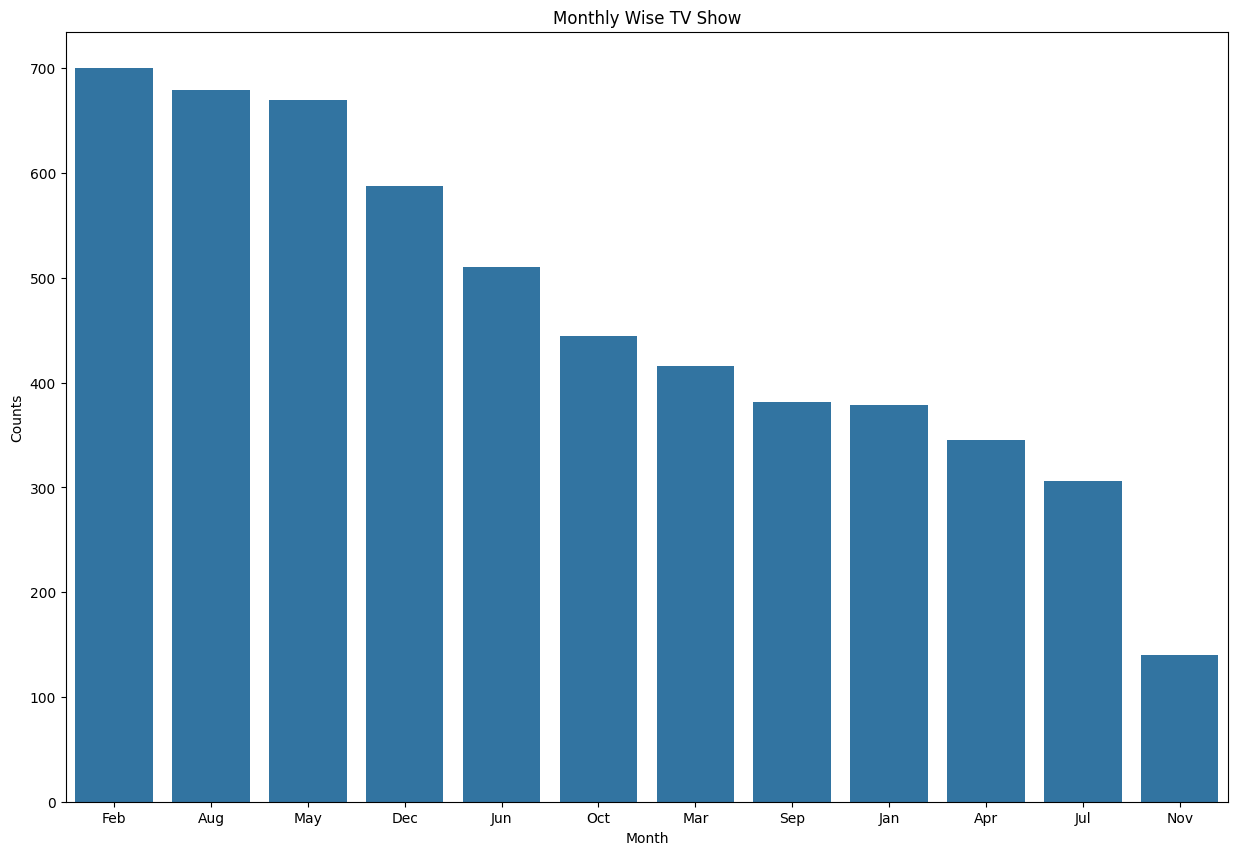

In [ ]:
def numToMonthNameCoverter(num):
  months_dict = {1.0: 'Jan', 2.0 : 'Feb', 3.0 : 'Mar', 4.0 : 'Apr' , 5.0 : 'May', 6.0 : 'Jun', 7.0 : 'Jul', 8.0 : 'Aug', 9.0 : 'Sep', 10.0 : 'Oct', 11.0 : 'Nov', 12.0 : 'Dec'}
  for n, m in months_dict.items():
    if num == n:
      return m

df['month'] = df['date_added'].dt.month
df['month'] = df['month'].apply(numToMonthNameCoverter)
monthTvShowdf = pd.DataFrame(df.loc[df['type'] == 'TV Show', ['month']])
Data = monthTvShowdf[monthTvShowdf['month'].isna() != True]
plt.figure(figsize=(15, 10))
plt.xlabel('Month')
plt.ylabel('Counts')
plt.title('Monthly Wise TV Show')
sns.countplot(x='month', data = Data, order = Data['month'].value_counts().index)
plt.show()


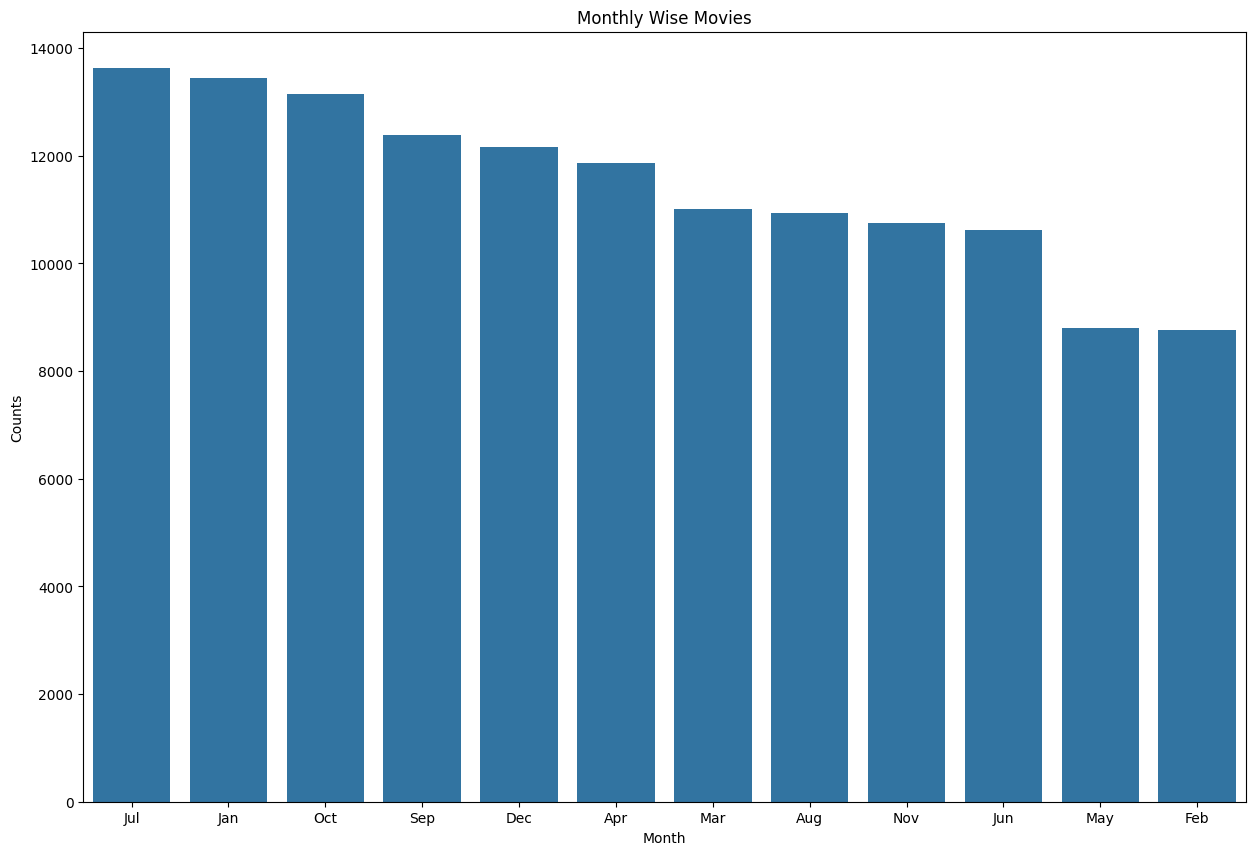

In [ ]:

monthTvShowdf = pd.DataFrame(df.loc[df['type'] == 'Movie', ['month']])
Data = monthTvShowdf[monthTvShowdf['month'].isna() != True]
plt.figure(figsize=(15, 10))
plt.xlabel('Month')
plt.ylabel('Counts')
plt.title('Monthly Wise Movies')
sns.countplot(x='month', data = Data, order = Data['month'].value_counts().index)
plt.show()

                     count
director                  
Jan Suter               21
Raúl Campos             19
Jay Karas               15
Marcus Raboy            14
Cathy Garcia-Molina     13
Martin Scorsese         12
Jay Chapman             12
Youssef Chahine         12
Steven Spielberg        11
Don Michael Paul        10


<Axes: xlabel='director'>

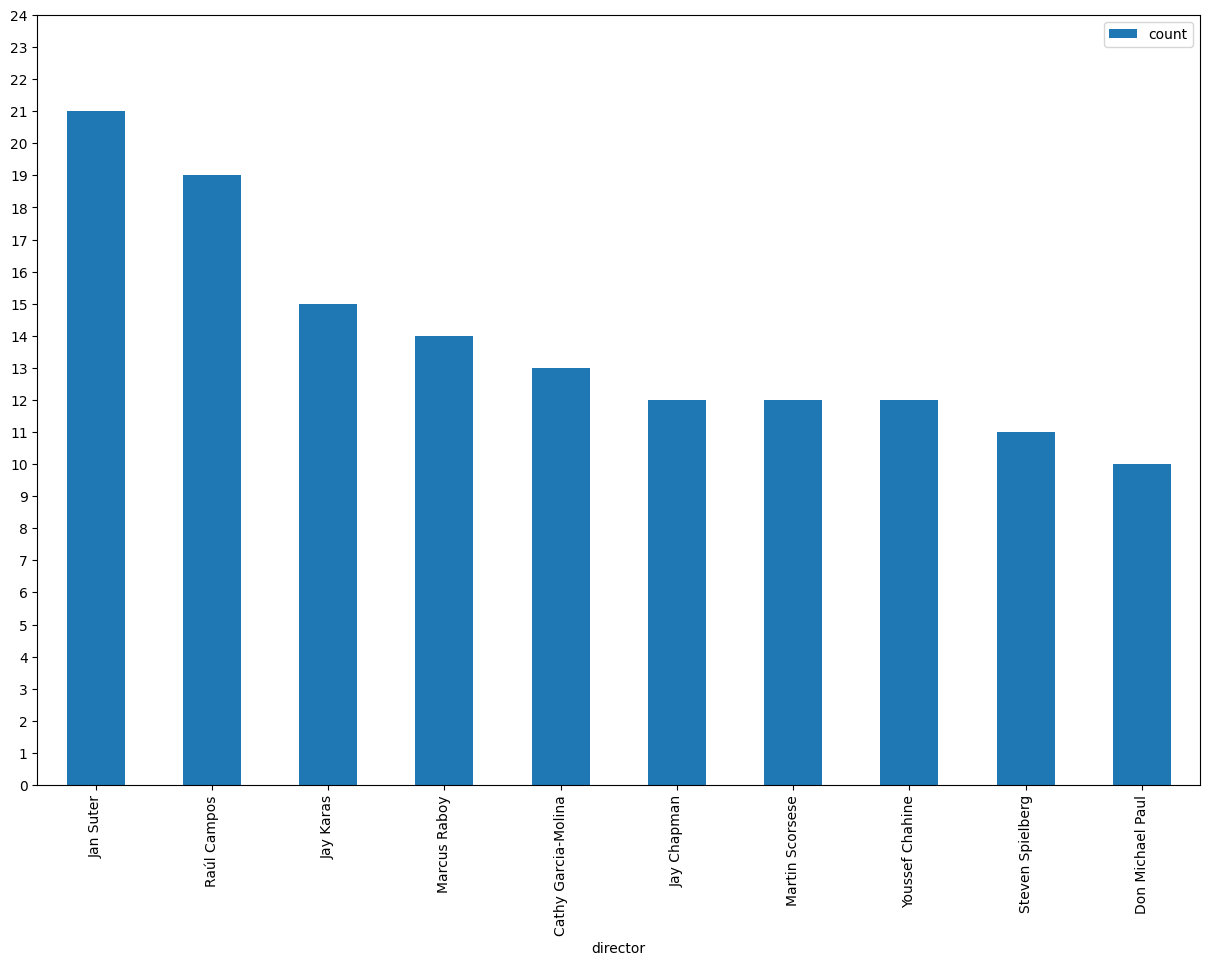

In [ ]:
#group by each director and find the count of unique titles of movies

director_df = df.loc[:, ['title','type', 'director']]
director_df.drop_duplicates(inplace=True)
director_df = director_df.loc[director_df['type'] == 'Movie']
director_df = director_df.loc[director_df['director'] != 'Unknown Director']
dmddf = director_df.groupby('director').count().rename(columns = {'title':'count'})
dmddf.drop('type', axis=1, inplace = True)
print(dmddf.sort_values(by='count', ascending=False).head(10))


dmpdf = director_df.groupby('director')[['title']].count()
dmpdf.rename(columns={"title": "count"}, inplace = True)
final_df = director_df.join(dmpdf, on = 'director')

final_df = final_df.loc[:, ['director', 'count']]
final_df.drop_duplicates(inplace=True)
final_df.sort_values('count', ascending=False, inplace=True)
# final_df = final_df.loc[final_df['director'] != 'Unknown Director']
final_df.head(10).plot(x="director", y="count", kind="bar", yticks=[i for i in range(25)], figsize=(15, 10))

                       count
director                    
Alastair Fothergill        3
Gautham Vasudev Menon      2
Rob Seidenglanz            2
Shin Won-ho                2
Iginio Straffi             2
Jung-ah Im                 2
Stan Lathan                2
Pantham Thongsang          1
Mike Smith                 1
Mohamed al Salman          1


<Axes: xlabel='director'>

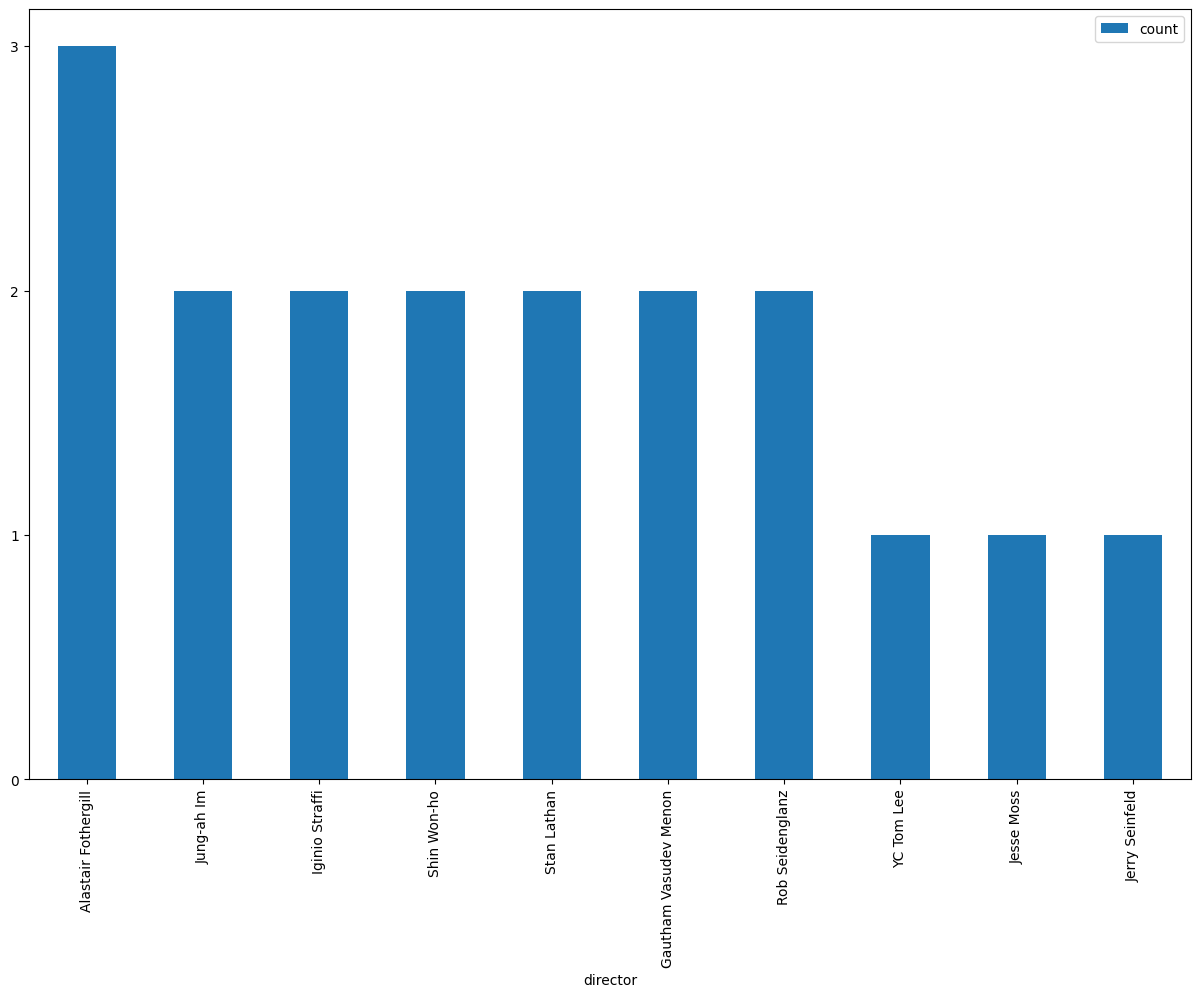

In [ ]:
#group by each director and find the count of unique titles of Tv-shows

director_df = df.loc[:, ['title','type', 'director']]
director_df.drop_duplicates(inplace=True)
director_df = director_df.loc[director_df['type'] == 'TV Show']
director_df = director_df.loc[director_df['director'] != 'Unknown Director']
dtddf = director_df.groupby('director').count().rename(columns = {'title':'count'})
dtddf.drop('type', axis=1, inplace = True)
print(dtddf.sort_values(by='count', ascending=False).head(10))

dtpdf = director_df.groupby('director')[['title']].count()
dtpdf.rename(columns={"title": "count"}, inplace = True)
final_df = director_df.join(dtpdf, on = 'director')
final_df = final_df.loc[:, ['director', 'count']]
final_df.drop_duplicates(inplace=True)
final_df.sort_values('count', ascending=False, inplace=True)
final_df.head(10).plot(x="director", y="count", kind="bar", yticks=[i for i in range(4)], figsize=(15, 10))

                    count
cast                     
David Attenborough      3
Carlos Cuevas           2
Bryce Papenbrook        2
Yoo Yeon-seok           2
Kira Buckland           2
Bae Doona               2
David Roach             2
Kaori Nazuka            2
Mamoru Miyano           2
Saygın Soysal           2


<Axes: xlabel='cast'>

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 12539 (\N{KATAKANA MIDDLE DOT}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12539 (\N{KATAKANA MIDDLE DOT}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


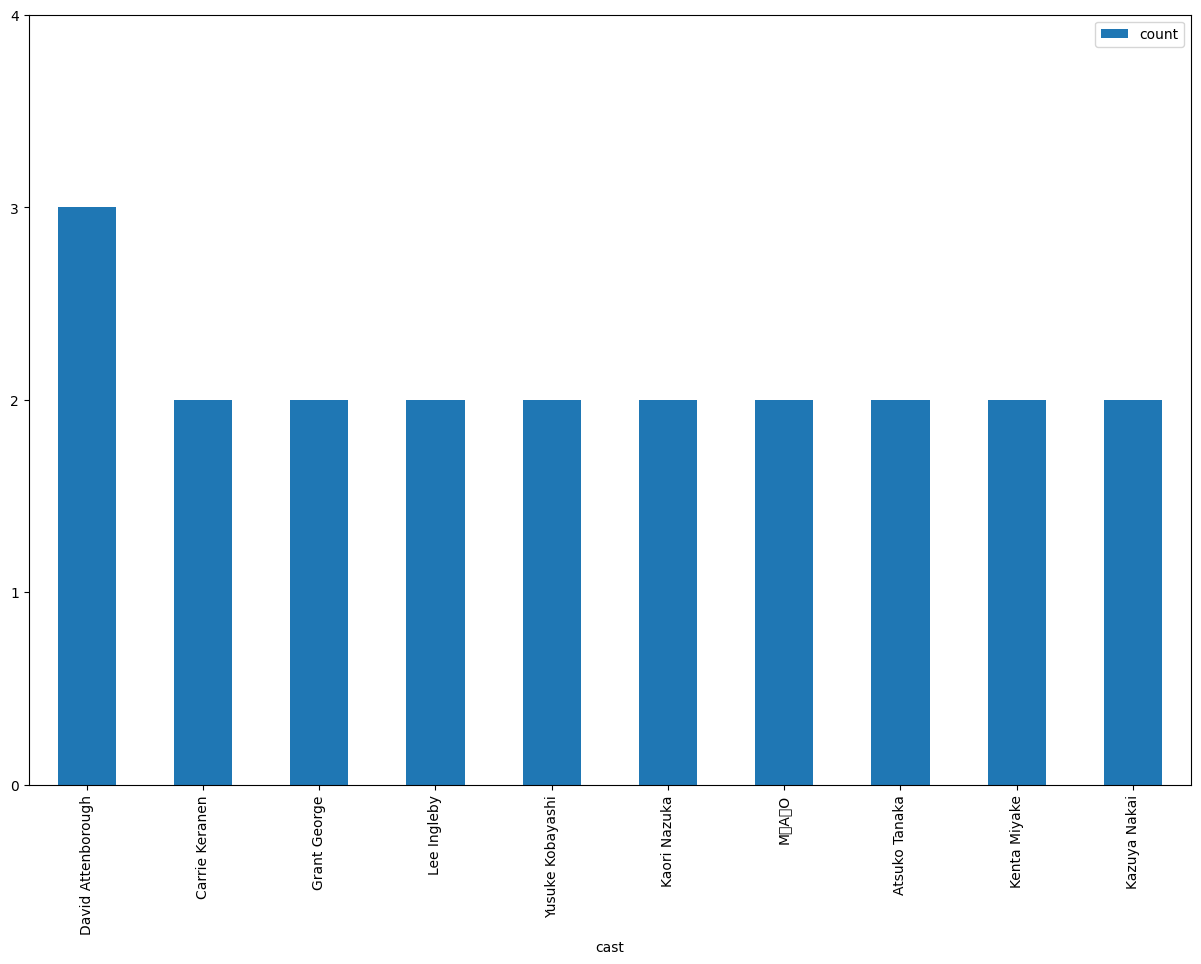

In [ ]:
#group by each actor and find the count of unique titles of Tv-shows

actor_df = df.loc[:, ['title','type', 'cast']]
actor_df.drop_duplicates(inplace=True)
actor_df = actor_df.loc[actor_df['type'] == 'TV Show']
actor_df = actor_df.loc[actor_df['cast'] != 'Unknown Actor']
dtddf = actor_df.groupby('cast').count().rename(columns = {'title':'count'})
dtddf.drop('type', axis=1, inplace = True)
print(dtddf.sort_values(by='count', ascending=False).head(10))

dtpdf = actor_df.groupby('cast')[['title']].count()
dtpdf.rename(columns={"title": "count"}, inplace = True)
final_df = actor_df.join(dtpdf, on = 'cast')
final_df = final_df.loc[:, ['cast', 'count']]
final_df.drop_duplicates(inplace=True)
final_df.sort_values('count', ascending=False, inplace=True)
final_df.head(10).plot(x="cast", y="count", kind="bar", yticks=[i for i in range(5)], figsize=(15, 10))

                   count
cast                    
Anupam Kher           42
Shah Rukh Khan        34
Naseeruddin Shah      31
Akshay Kumar          30
Om Puri               30
Amitabh Bachchan      28
Paresh Rawal          28
Boman Irani           27
Kareena Kapoor        25
Samuel L. Jackson     21


<Axes: xlabel='cast'>

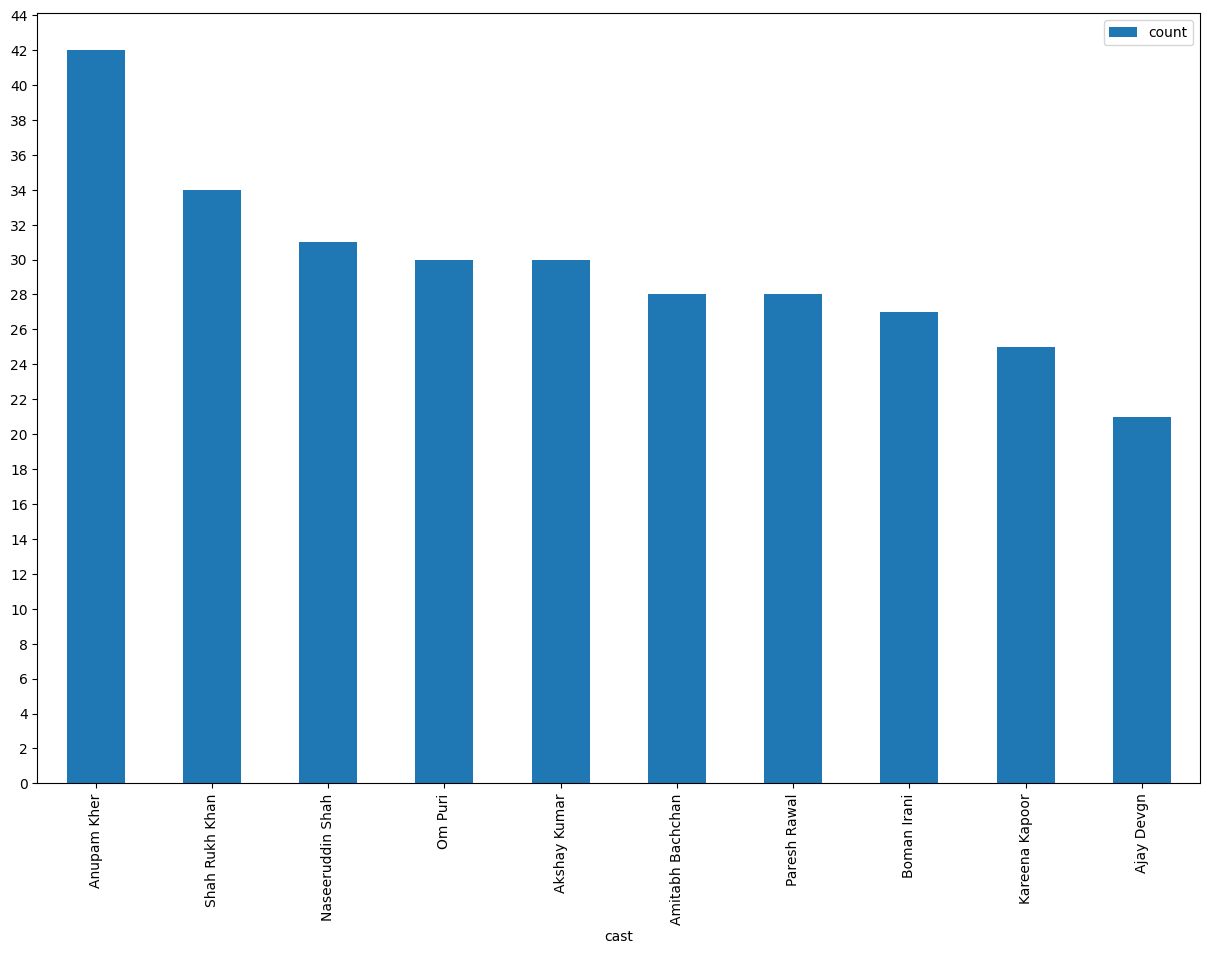

In [ ]:
#group by each actor and find the count of unique titles of Movies

actor_df = df.loc[:, ['title','type', 'cast']]
actor_df.drop_duplicates(inplace=True)
actor_df = actor_df.loc[actor_df['type'] == 'Movie']
actor_df = actor_df.loc[actor_df['cast'] != 'Unknown Actor']
dtddf = actor_df.groupby('cast').count().rename(columns = {'title':'count'})
dtddf.drop('type', axis=1, inplace = True)
print(dtddf.sort_values(by='count', ascending=False).head(10))

dtpdf = actor_df.groupby('cast')[['title']].count()
dtpdf.rename(columns={"title": "count"}, inplace = True)
final_df = actor_df.join(dtpdf, on = 'cast')
final_df = final_df.loc[:, ['cast', 'count']]
final_df.drop_duplicates(inplace=True)
final_df.sort_values('count', ascending=False, inplace=True)
final_df.head(10).plot(x="cast", y="count", kind="bar", yticks=[i for i in range(0,45,2)], figsize=(15, 10))

                   count
cast                    
James Franco          19
Tinnu Anand           16
Aamir Khan            16
Seth Rogen            15
Ramsey Nouah          13
Martin Lawrence       12
Robb Wells            12
George Clooney        11
Mahesh Manjrekar      11
Michael Jai White     11


<Axes: title={'center': 'Top 10 directors appeared in TV shows and Movies'}, xlabel='cast'>

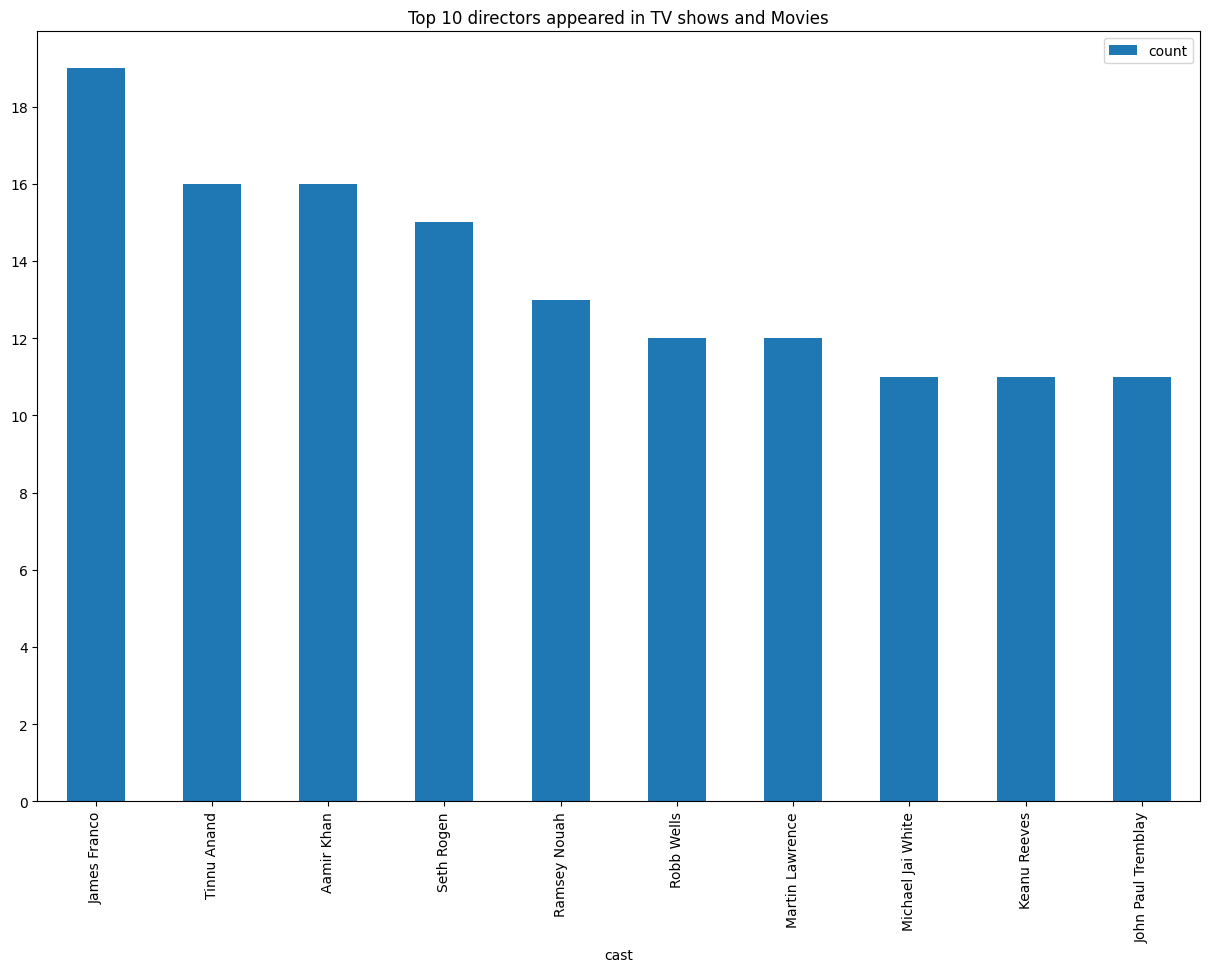

In [ ]:
# 4. Analysis of actors/directors of different types of shows/movies.
# a. Identify the top 10 directors who have appeared in most movies or TV shows.
# Hint : We want you to group by each actor and find the count of unique titles of
# Tv-shows/movies

# b. Identify the top 10 directors who have appeared in most movies or TV shows.
# Hint : We want you to group by each director and find the count of unique titles
# of Tv-shows/movies

tcd_df = df.loc[:, ['title','cast', 'director']]
tcd_df[tcd_df['director'] != 'Unknown Director']
unique_directors = tcd_df['director'].unique()
directors = unique_directors.tolist()

def isActorInDirector(actor):
  if actor in directors:
    return True
  else:
    return False



directors_acted_df = tcd_df[tcd_df['cast'].apply(lambda x:isActorInDirector(x))]
directors_acted_df = directors_acted_df.loc[:,['title', 'cast']].drop_duplicates().groupby('cast')[['title']].count()
directors_acted_df.rename(columns = {'title':'count'}, inplace = True)
print(directors_acted_df.sort_values(by='count', ascending = False).head(10))



final_df = tcd_df.join(directors_acted_df, on = 'cast')
final_df = final_df.loc[:, ['cast', 'count']]
final_df.drop_duplicates(inplace=True)
final_df.sort_values('count', ascending=False, inplace=True)
final_df.head(10).plot(x="cast", y="count", kind="bar", yticks=[i for i in range(0,20,2)], figsize=(15, 10), title='Top 10 directors appeared in TV shows and Movies')

<Axes: title={'center': 'Top 10 directors appeared in Movies'}, xlabel='cast'>

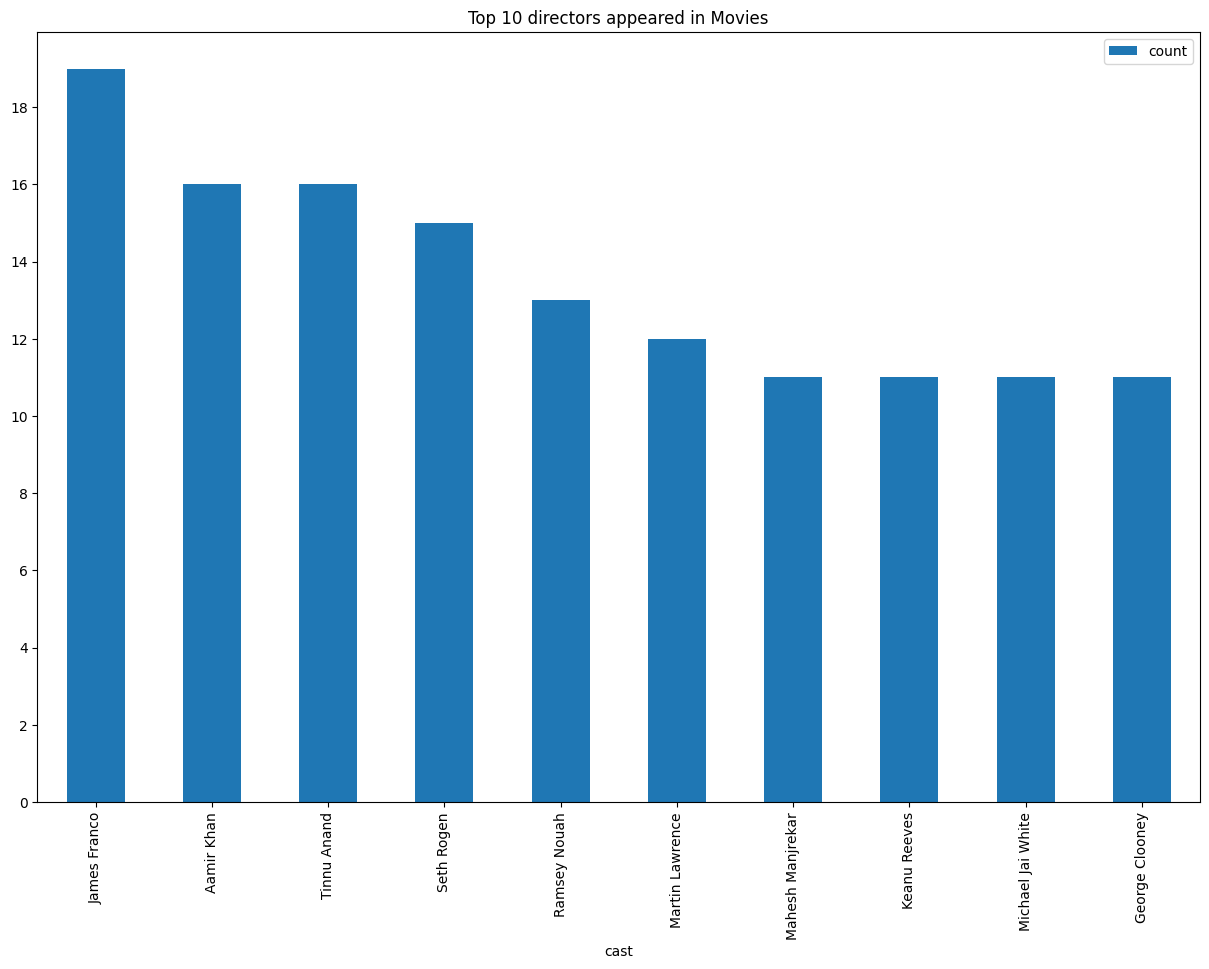

In [ ]:
tcd_df = df.loc[:, ['title','cast', 'director', 'type']]
tcd_df = tcd_df[tcd_df['type'] == 'Movie']
tcd_df[tcd_df['director'] != 'Unknown Director']
unique_directors = tcd_df['director'].unique()
directors = unique_directors.tolist()

def isActorInDirector(actor):
  if actor in directors:
    return True
  else:
    return False



directors_acted_df = tcd_df[tcd_df['cast'].apply(lambda x:isActorInDirector(x))]
directors_acted_df = directors_acted_df.loc[:,['title', 'cast']].drop_duplicates().groupby('cast')[['title']].count()
directors_acted_df.rename(columns = {'title':'count'}, inplace = True)
directors_acted_df.sort_values(by='count', ascending = False).head(10)

final_df = tcd_df.join(directors_acted_df, on = 'cast')
final_df = final_df.loc[:, ['cast', 'count']]
final_df.drop_duplicates(inplace=True)
final_df.sort_values('count', ascending=False, inplace=True)
final_df.head(10).plot(x="cast", y="count", kind="bar", yticks=[i for i in range(0,20,2)], figsize=(15, 10), title='Top 10 directors appeared in Movies')

                       count
cast                        
Gautham Vasudev Menon      2
Arvind Swamy               1
He Xiaofeng                1
Jerry Seinfeld             1
John Paul Tremblay         1
Mike Smith                 1
Oliver Stone               1
Peter Ho                   1
Robb Wells                 1
Stefan Brogren             1 




<Axes: title={'center': 'Top 10 directors appeared in TV shows'}, xlabel='cast'>

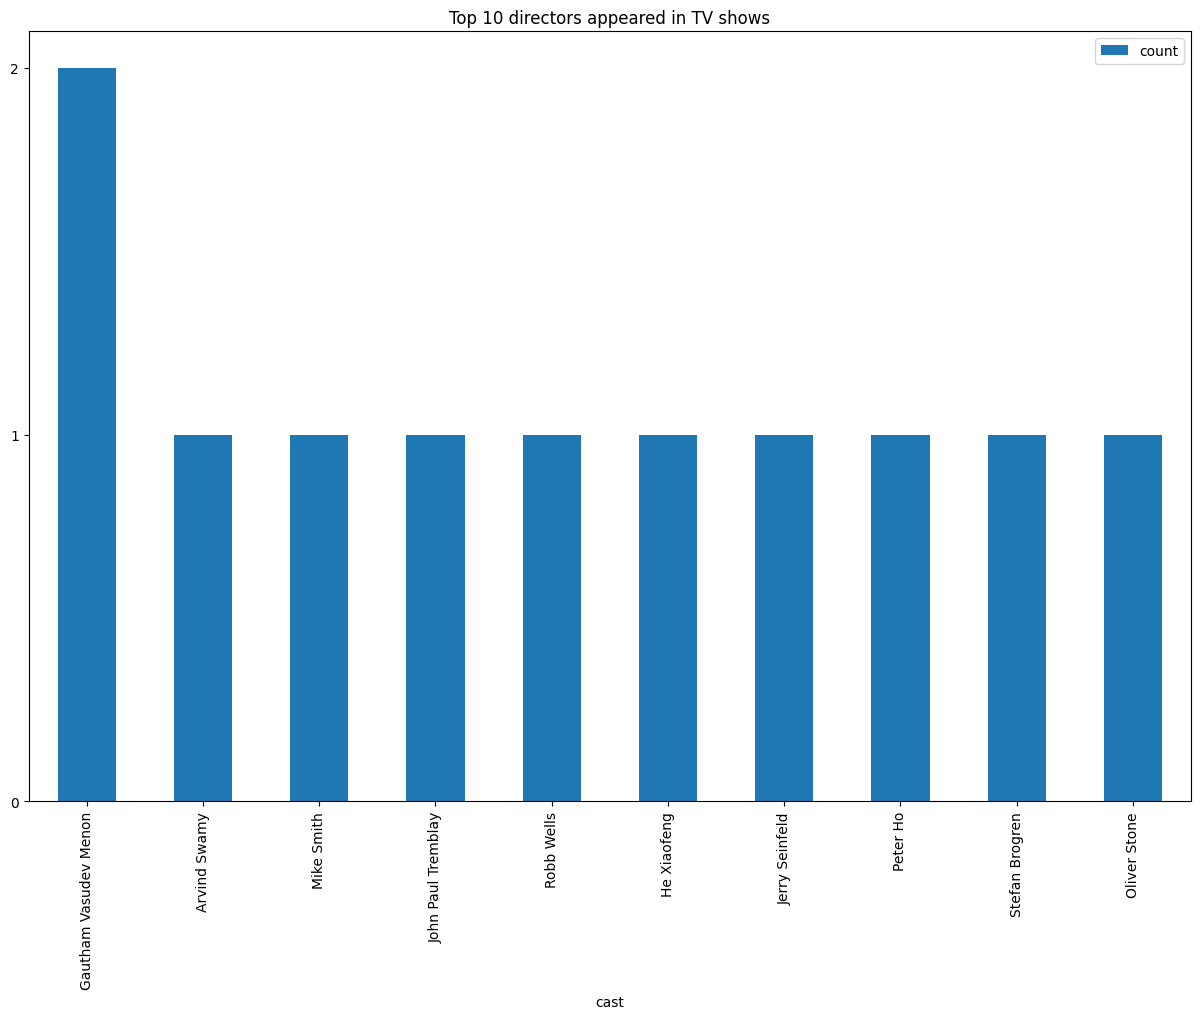

In [ ]:
tcd_df = df.loc[:, ['title','cast', 'director', 'type']]
tcd_df = tcd_df[tcd_df['type'] == 'TV Show']
tcd_df[tcd_df['director'] != 'Unknown Director']
unique_directors = tcd_df['director'].unique()
directors = unique_directors.tolist()

def isActorInDirector(actor):
  if actor in directors:
    return True
  else:
    return False



directors_acted_df = tcd_df[tcd_df['cast'].apply(lambda x:isActorInDirector(x))]
directors_acted_df = directors_acted_df.loc[:,['title', 'cast']].drop_duplicates().groupby('cast').count()
directors_acted_df.rename(columns = {'title':'count'}, inplace = True)
print(directors_acted_df.sort_values(by='count', ascending = False).head(10), '\n\n')

final_df = tcd_df.join(directors_acted_df, on = 'cast')
final_df = final_df.loc[:, ['cast', 'count']]
final_df.drop_duplicates(inplace=True)
final_df.sort_values('count', ascending=False, inplace=True)
final_df.head(10).plot(x="cast", y="count", kind="bar", yticks=[i for i in range(0,3,1)], figsize=(15, 10), title='Top 10 directors appeared in TV shows')

(-0.5, 1599.5, 799.5, -0.5)

<Figure size 640x480 with 0 Axes>

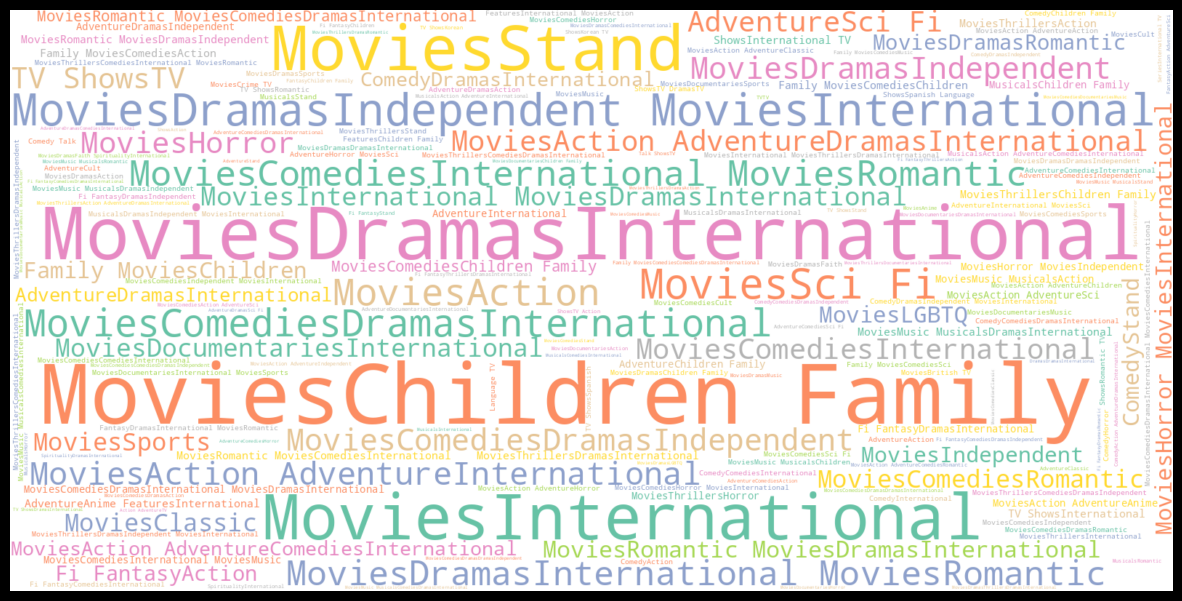

In [ ]:
#5.Which genre movies are more popular or produced more
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
stopwords = set(STOPWORDS)
genre_df = df.loc[:,['title', 'listed_in']]
genre_df.drop_duplicates(inplace = True)

wordcloud = WordCloud(background_color = 'white', stopwords = stopwords, width =1600, height = 800, colormap = "Set2" ).generate(''.join(genre_df['listed_in']))
plt.figure()
plt.figure(figsize = (15,10), facecolor = 'k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')


<ipython-input-135-d22928dbc337>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_genre_df.drop_duplicates(inplace = True)


<Figure size 640x480 with 0 Axes>

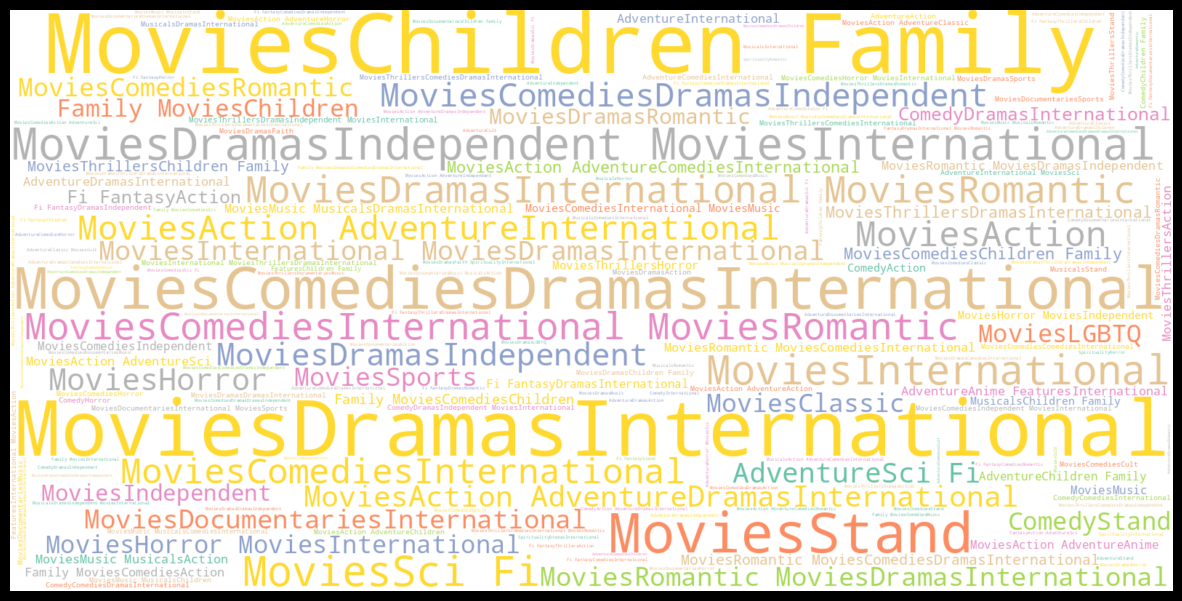

In [ ]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
stopwords = set(STOPWORDS)
genre_df = df.loc[:,['title', 'listed_in', 'type']]
movie_genre_df = genre_df[genre_df['type']=='Movie']
movie_genre_df.drop_duplicates(inplace = True)

wordcloud = WordCloud(background_color = 'white', stopwords = stopwords, width =1600, height = 800, colormap = "Set2" ).generate(''.join(movie_genre_df['listed_in']))
plt.figure()
plt.figure(figsize = (15,10), facecolor = 'k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


<ipython-input-136-fefa6df2f8da>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tvshow_genre_df.drop_duplicates(inplace = True)


<Figure size 640x480 with 0 Axes>

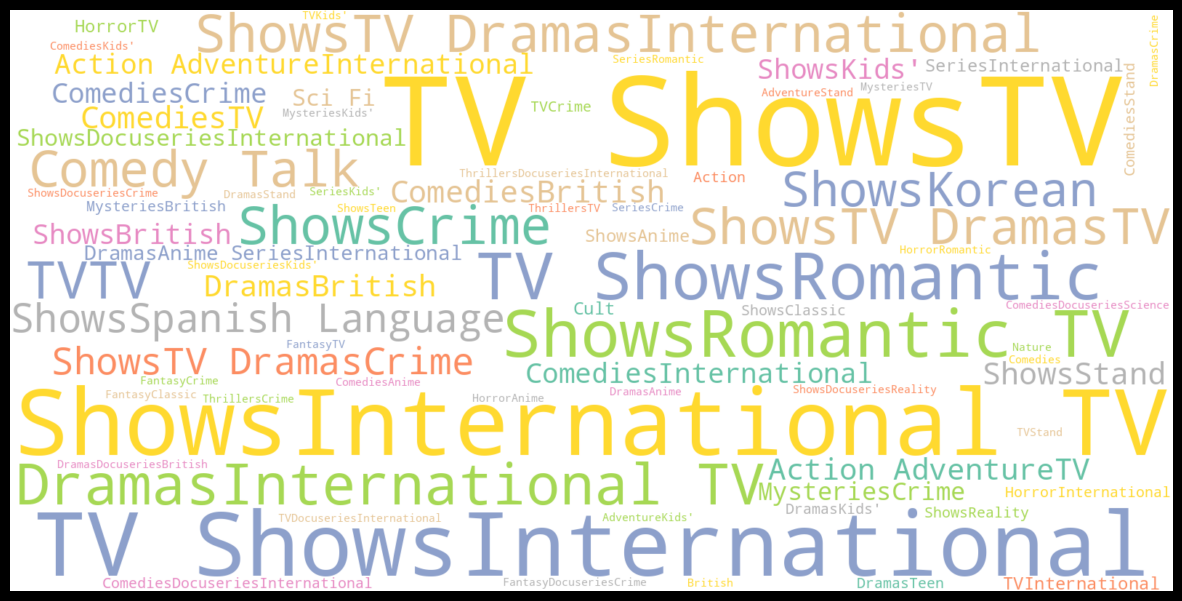

In [ ]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
stopwords = set(STOPWORDS)
genre_df = df.loc[:,['title', 'listed_in', 'type']]
tvshow_genre_df = genre_df[genre_df['type']=='TV Show']
tvshow_genre_df.drop_duplicates(inplace = True)
tvshow_genre_df

wordcloud = WordCloud(background_color = 'white', stopwords = stopwords, width =1600, height = 800, colormap = "Set2" ).generate(''.join(tvshow_genre_df['listed_in']))
plt.figure()
plt.figure(figsize = (15,10), facecolor = 'k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
date_added_release_df = df.loc[:,['title', 'release_year', 'added_year']]
date_added_release_df['release_year'].dropna(inplace = True)
date_added_release_df.drop(date_added_release_df[date_added_release_df['added_year']=='NaT'].index, inplace=True)
date_added_release_df['added_year'] = pd.to_numeric(date_added_release_df['added_year'])

date_added_release_df['year_difference'] = date_added_release_df['added_year'] - date_added_release_df['release_year']
print(date_added_release_df['year_difference'].mode())

0    0
Name: year_difference, dtype: int64


Univariate Analysis separately for shows and movies in United Kingdom

In [ ]:
#Analyzing UK for both shows and movies
df_uk_shows=df[df['country']=='United Kingdom'][df[df['country']=='United Kingdom']['type']=='TV Show']
df_uk_movies=df[df['country']=='United Kingdom'][df[df['country']=='United Kingdom']['type']=='Movie']
df_uk_movies

show_id   type         title      director                 cast  \
7         s8  Movie       Sankofa  Haile Gerima         Kofi Ghanaba   
7         s8  Movie       Sankofa  Haile Gerima         Kofi Ghanaba   
7         s8  Movie       Sankofa  Haile Gerima         Kofi Ghanaba   
7         s8  Movie       Sankofa  Haile Gerima  Oyafunmike Ogunlano   
7         s8  Movie       Sankofa  Haile Gerima  Oyafunmike Ogunlano   
...      ...    ...           ...           ...                  ...   
8786   s8787  Movie  You Can Tutu   James Brown   Zahra Hassan Malik   
8786   s8787  Movie  You Can Tutu   James Brown         Cleo Badcock   
8786   s8787  Movie  You Can Tutu   James Brown       Stuart Manning   
8786   s8787  Movie  You Can Tutu   James Brown          Ali Bastian   
8786   s8787  Movie  You Can Tutu   James Brown          Amanda Holt   

             country date_added  release_year rating duration  \
7     United Kingdom 2021-09-24          1993  TV-MA  125 min   
7     United Kingdom 2021-09-24          1993  TV-MA  125 min   
7     United Kingdom 2021-09-24          1993  TV-MA  125 min   
7     United Kingdom 2021-09-24          1993  TV-MA  125 min   
7     United Kingdom 2021-09-24          1993  TV-MA  125 min   
...              ...        ...           ...    ...      ...   
8786  United Kingdom 2017-12-31          2017   TV-G   87 min   
8786  United Kingdom 2017-12-31          2017   TV-G   87 min   
8786  United Kingdom 2017-12-31          2017   TV-G   87 min   
8786  United Kingdom 2017-12-31          2017   TV-G   87 min   
8786  United Kingdom 2017-12-31          2017   TV-G   87 min   

                     listed_in  \
7                       Dramas   
7           Independent Movies   
7         International Movies   
7                       Dramas   
7           Independent Movies   
...                        ...   
8786  Children & Family Movies   
8786  Children & Family Movies   
8786  Children & Family Movies   
8786  Children & Family Movies   
8786  Children & Family Movies   

                                            description added_year  week month  
7     On a photo shoot in Ghana, an American model s...       2021    38   Sep  
7     On a photo shoot in Ghana, an American model s...       2021    38   Sep  
7     On a photo shoot in Ghana, an American model s...       2021    38   Sep  
7     On a photo shoot in Ghana, an American model s...       2021    38   Sep  
7     On a photo shoot in Ghana, an American model s...       2021    38   Sep  
...                                                 ...        ...   ...   ...  
8786  A gifted young ballet dancer struggles to find...       2017    52   Dec  
8786  A gifted young ballet dancer struggles to find...       2017    52   Dec  
8786  A gifted young ballet dancer struggles to find...       2017    52   Dec  
8786  A gifted young ballet dancer struggles to find...       2017    52   Dec  
8786  A gifted young ballet dancer struggles to find...       2017    52   Dec  

[8396 rows x 15 columns]

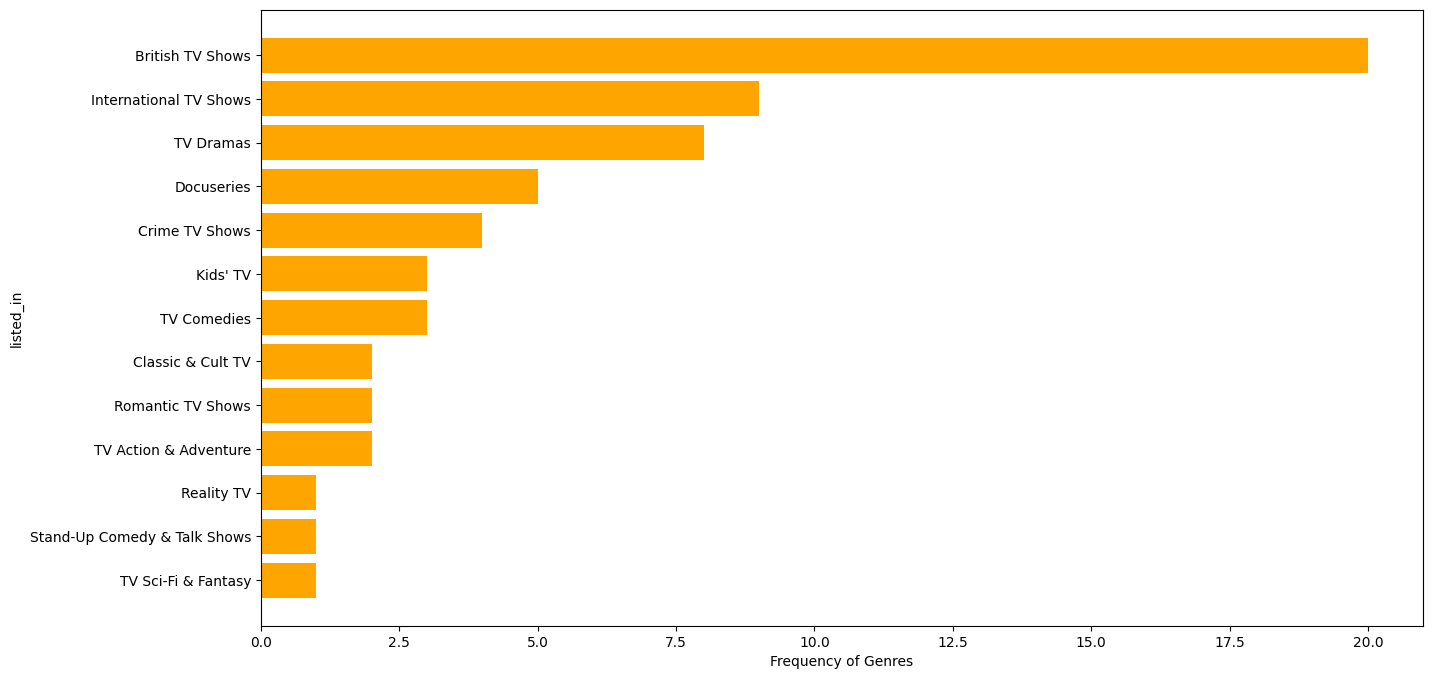

In [ ]:
df_genre=df_uk_shows.groupby(['listed_in']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:15]
plt.figure(figsize=(15,8))
plt.barh(df_genre[::-1]['listed_in'], df_genre[::-1]['title'],color=['orange'])
plt.xlabel('Frequency of Genres')
plt.ylabel('listed_in')
plt.show()

British TV Shows,International TV Shows,Docuseries, Crime, Comedy are widely watched Genres in TV Shows in UK


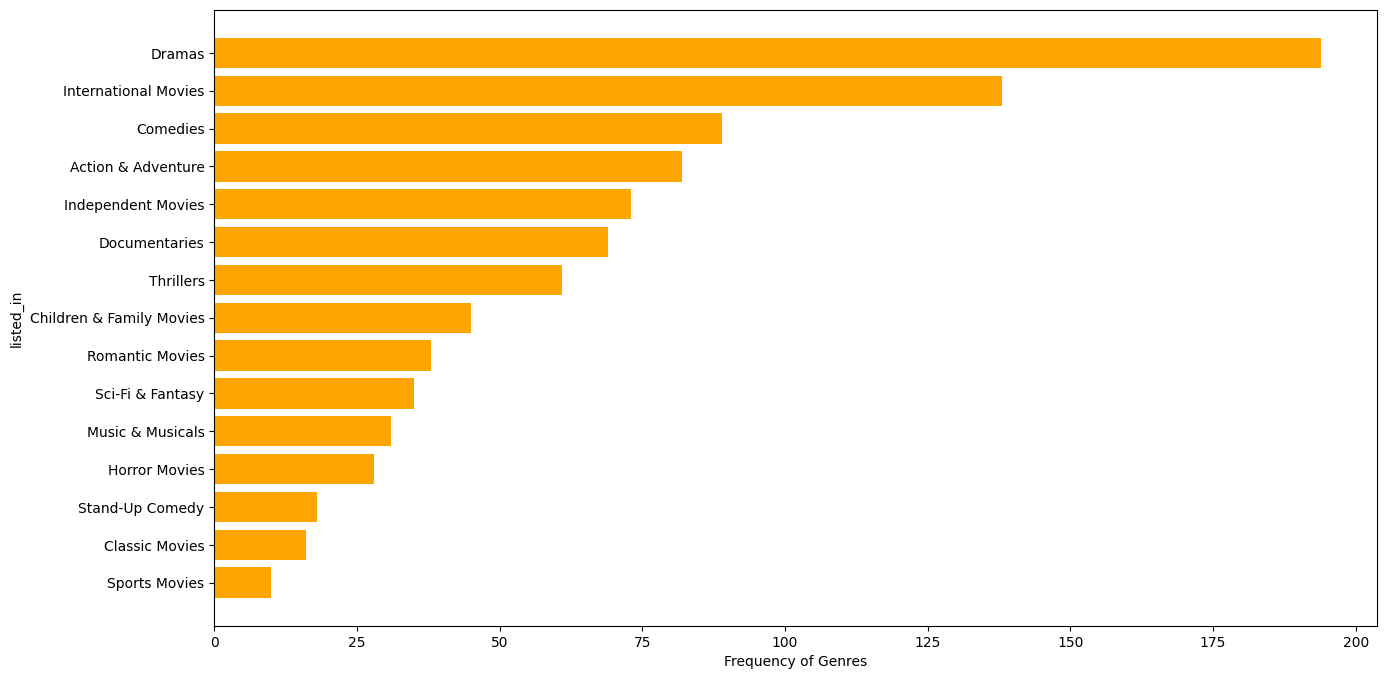

In [ ]:
df_genre=df_uk_movies.groupby(['listed_in']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:15]
plt.figure(figsize=(15,8))
plt.barh(df_genre[::-1]['listed_in'], df_genre[::-1]['title'],color=['orange'])
plt.xlabel('Frequency of Genres')
plt.ylabel('listed_in')
plt.show()

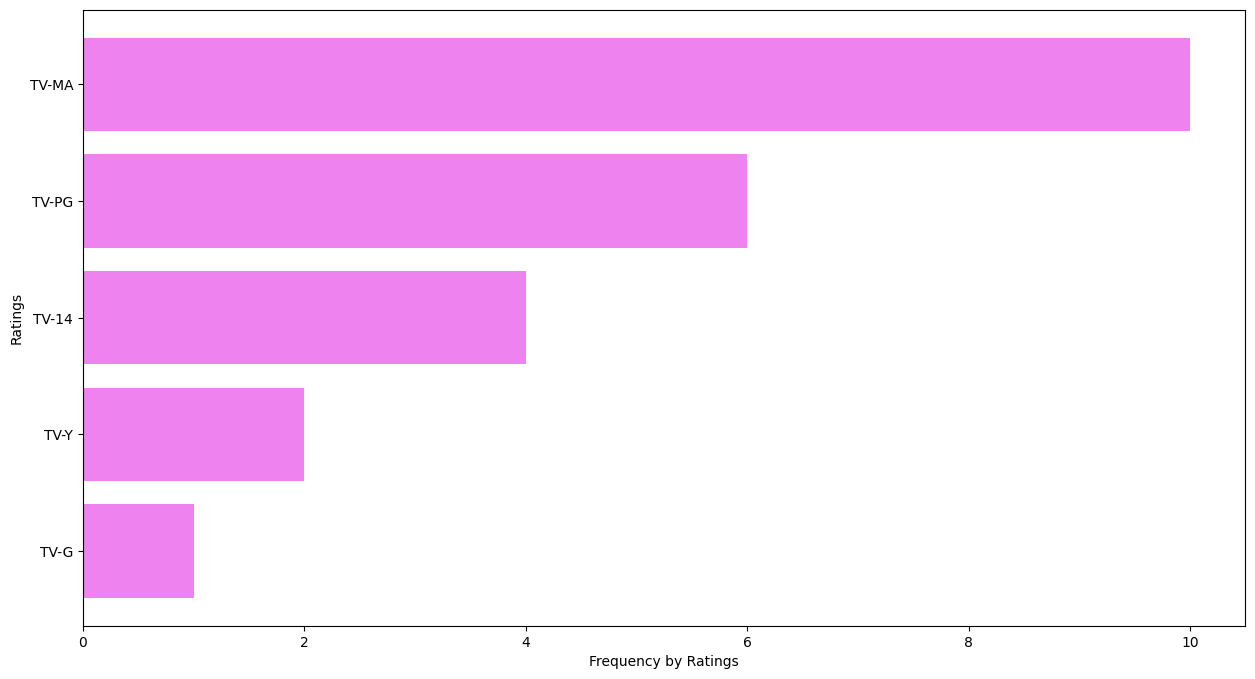

In [ ]:
df_rating=df_uk_shows.groupby(['rating']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:15]
plt.figure(figsize=(15,8))
plt.barh(df_rating[::-1]['rating'], df_rating[::-1]['title'],color=['violet'])
plt.xlabel('Frequency by Ratings')
plt.ylabel('Ratings')
plt.show()

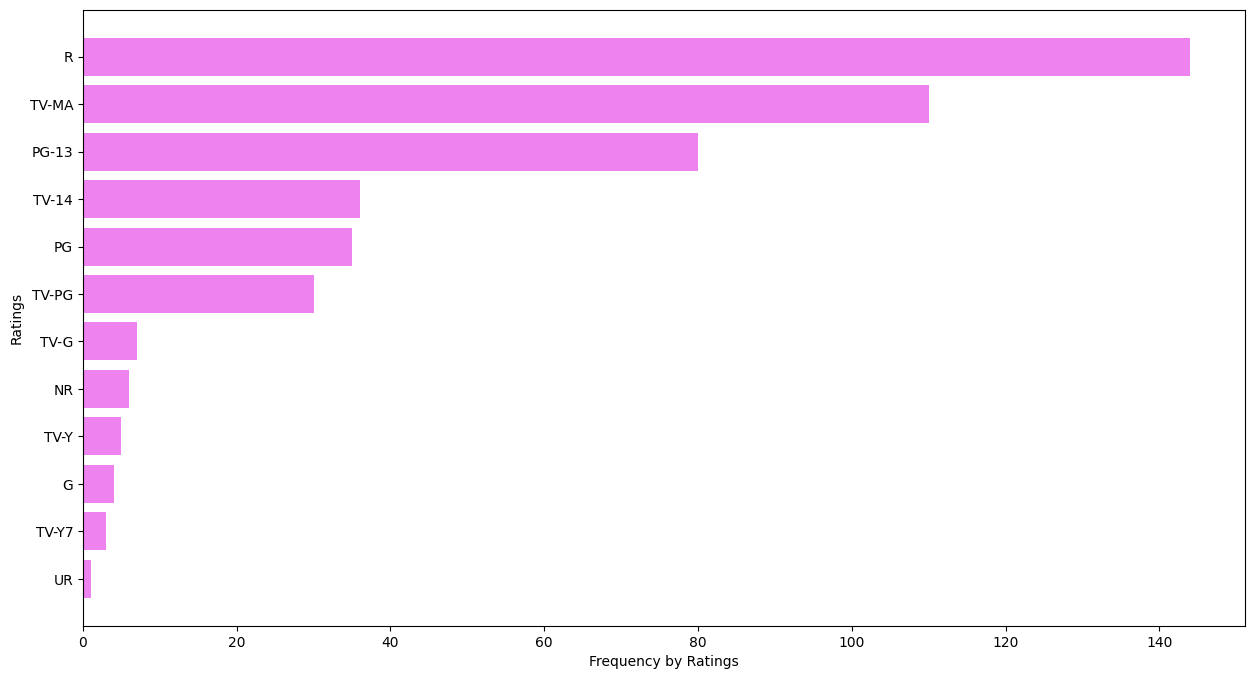

In [ ]:
df_rating=df_uk_movies.groupby(['rating']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:15]
plt.figure(figsize=(15,8))
plt.barh(df_rating[::-1]['rating'], df_rating[::-1]['title'],color=['violet'])
plt.xlabel('Frequency by Ratings')
plt.ylabel('Ratings')
plt.show()

So it seems plaussible to conclude that the popular ratings across Netflix includes Parental Guidance and Mature Audiences in TV Shows and R Rated+MA Rated in Movies in UK


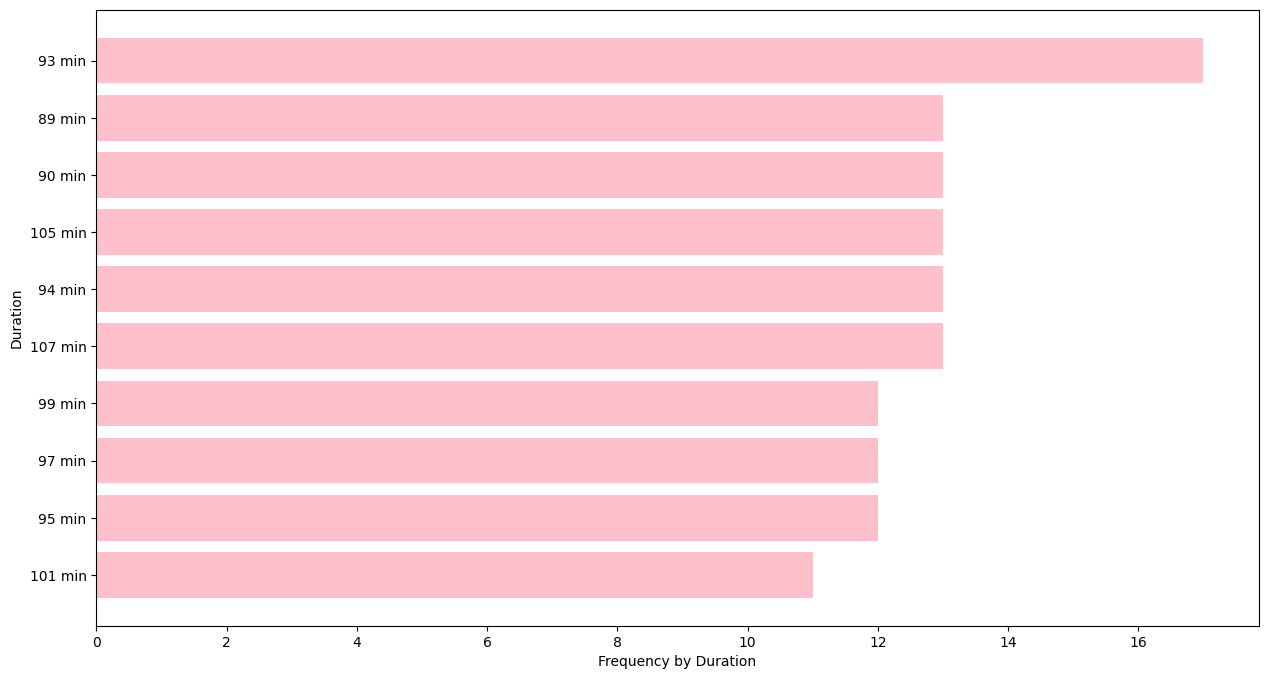

In [ ]:
df_duration=df_uk_movies.groupby(['duration']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:10]
plt.figure(figsize=(15,8))
plt.barh(df_duration[::-1]['duration'], df_duration[::-1]['title'],color=['pink'])
plt.xlabel('Frequency by Duration')
plt.ylabel('Duration')
plt.show()

Across movies ranges of minutes in UK have a sweet spot at 80-120 mins.

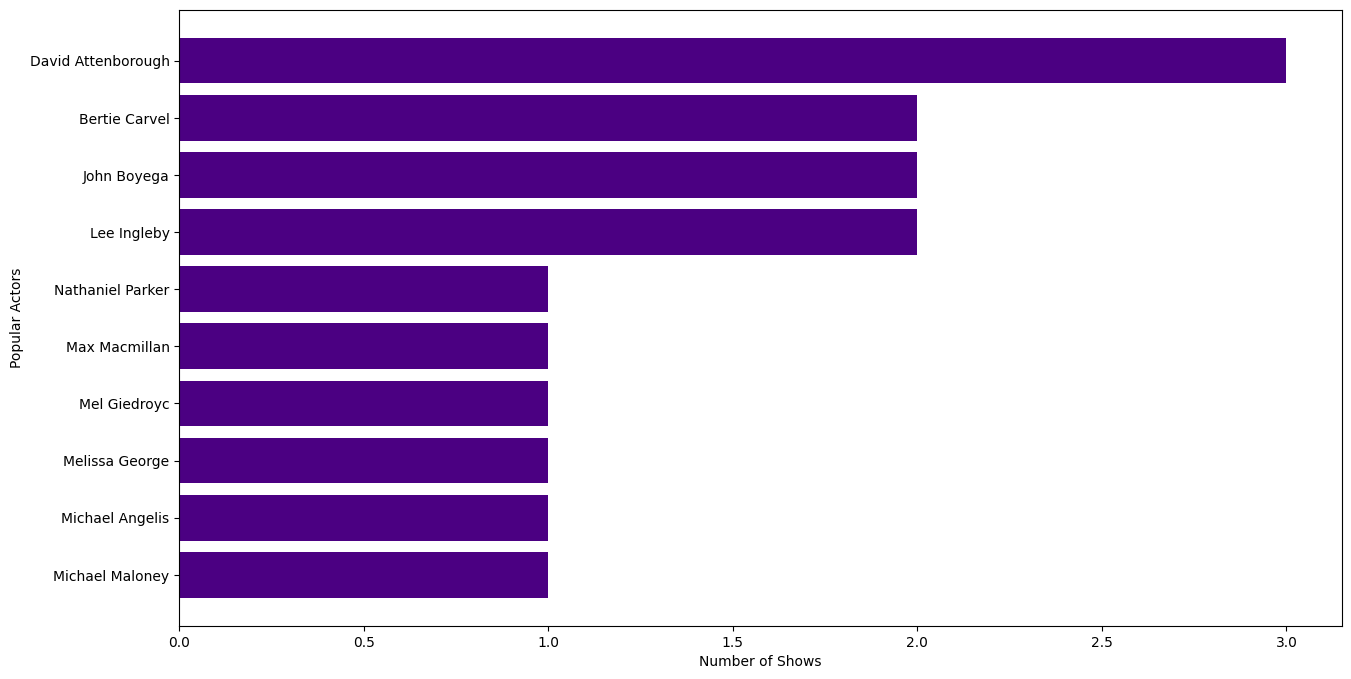

In [ ]:
df_actors=df_uk_shows.groupby(['cast']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:10]
df_actors=df_actors[df_actors['cast']!='Unknown Actor']
plt.figure(figsize=(15,8))
plt.barh(df_actors[::-1]['cast'], df_actors[::-1]['title'],color=['indigo'])
plt.xlabel('Number of Shows')
plt.ylabel('Popular Actors')
plt.show()

In [ ]:
df_actors['cast'].values

array(['David Attenborough', 'Bertie Carvel', 'John Boyega',
       'Lee Ingleby', 'Nathaniel Parker', 'Max Macmillan', 'Mel Giedroyc',
       'Melissa George', 'Michael Angelis', 'Michael Maloney'],
      dtype=object)

Popular Actors in TV Shows in UK are:-

'David Attenborough',
'Terry Jones',
'Graham Chapman',
'John Cleese',
'Eric Idle',
'Michael Palin',
'Terry Gilliam',
'Teresa Gallagher',
'Harriet Walter'

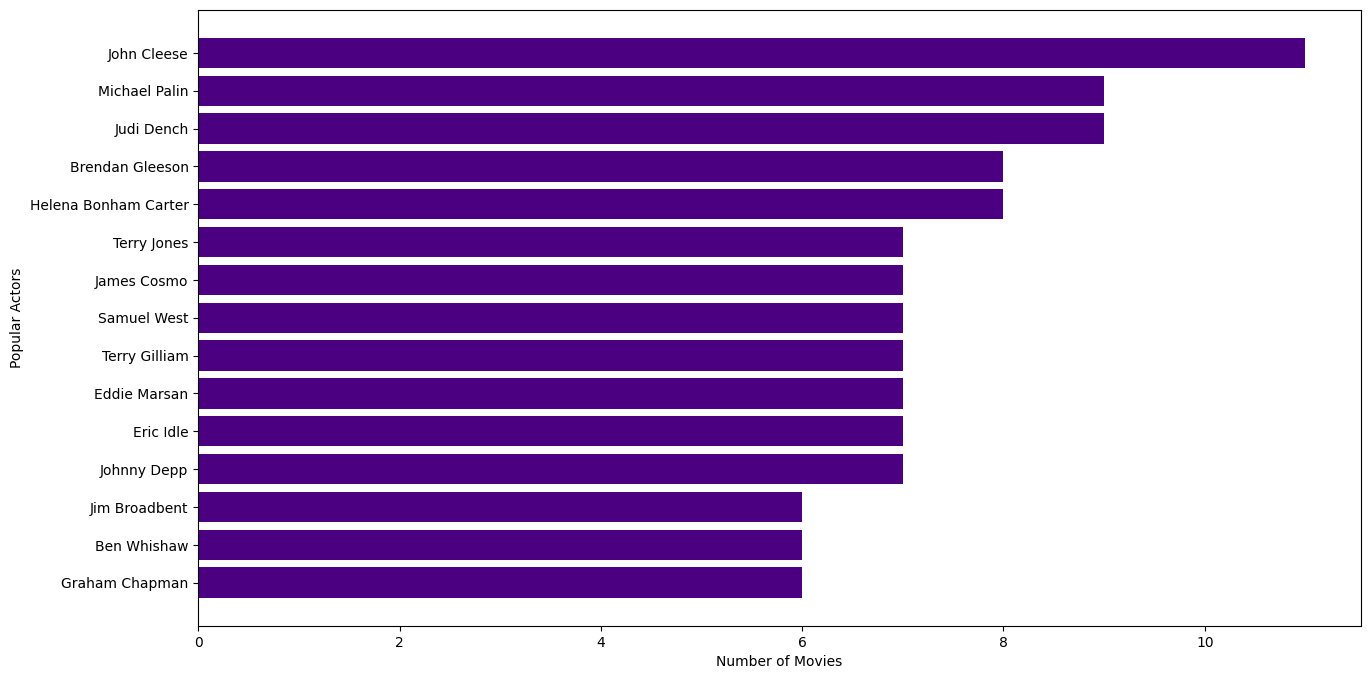

In [ ]:

df_actors=df_uk_movies.groupby(['cast']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:15]
df_actors=df_actors[df_actors['cast']!='Unknown Actor']
plt.figure(figsize=(15,8))
plt.barh(df_actors[::-1]['cast'], df_actors[::-1]['title'],color=['indigo'])
plt.xlabel('Number of Movies')
plt.ylabel('Popular Actors')
plt.show()

In [ ]:
df_actors['cast'].values

array(['John Cleese', 'Michael Palin', 'Judi Dench', 'Brendan Gleeson',
       'Helena Bonham Carter', 'Terry Jones', 'James Cosmo',
       'Samuel West', 'Terry Gilliam', 'Eddie Marsan', 'Eric Idle',
       'Johnny Depp', 'Jim Broadbent', 'Ben Whishaw', 'Graham Chapman'],
      dtype=object)

**Popular actors across Movies in UK:-**

'John Cleese',

'Michael Palin',

'Judi Dench',

'Keith Wickham',

'Eric Idle',

'Brendan Gleeson',

'Terry Gilliam',

'Terry Jones',

'Helena Bonham Carter',

'Graham Chapman',

'Samuel West',

'Eddie Marsan',

'James Cosmo',

'Rob Rackstraw'

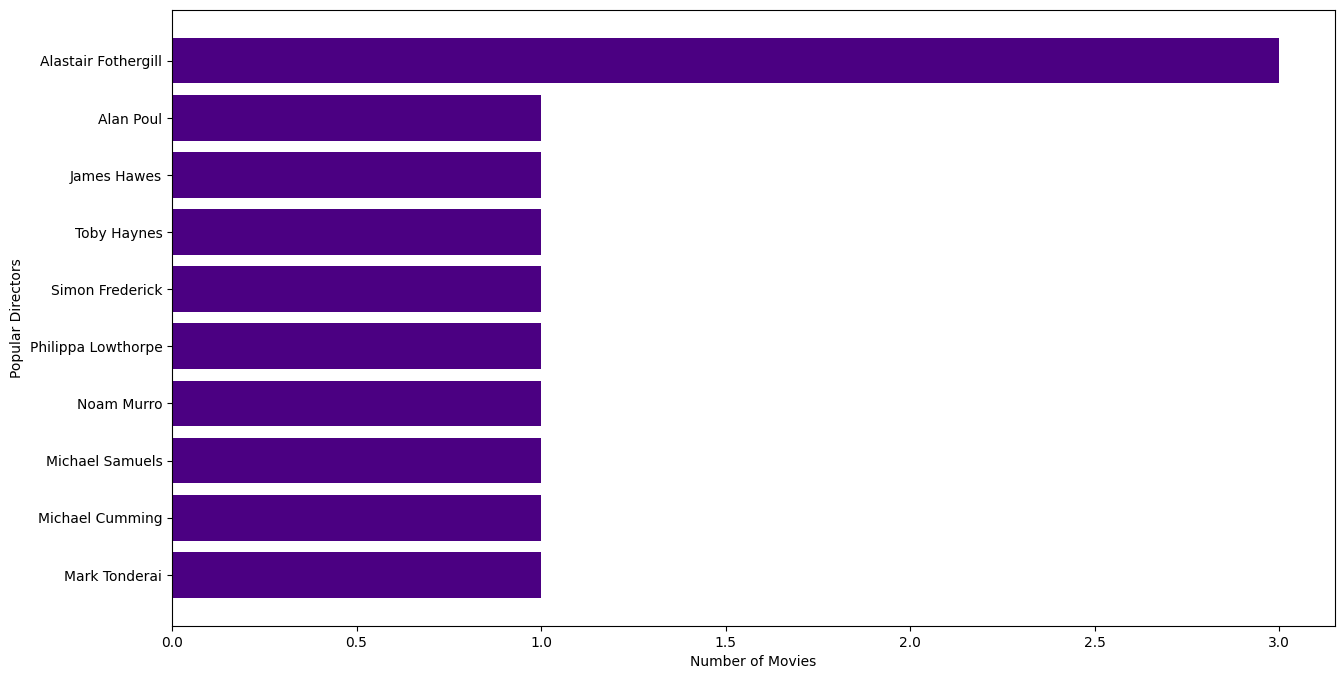

In [ ]:
df_directors=df_uk_shows.groupby(['director']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:10]
df_directors=df_directors[df_directors['director']!='Unknown Director']
plt.figure(figsize=(15,8))
plt.barh(df_directors[::-1]['director'], df_directors[::-1]['title'],color=['indigo'])
plt.xlabel('Number of Movies')
plt.ylabel('Popular Directors')
plt.show()

In [ ]:
df_directors['director'].values

array(['Alastair Fothergill', 'Alan Poul', 'James Hawes', 'Toby Haynes',
       'Simon Frederick', 'Philippa Lowthorpe', 'Noam Murro',
       'Michael Samuels', 'Michael Cumming', 'Mark Tonderai'],
      dtype=object)

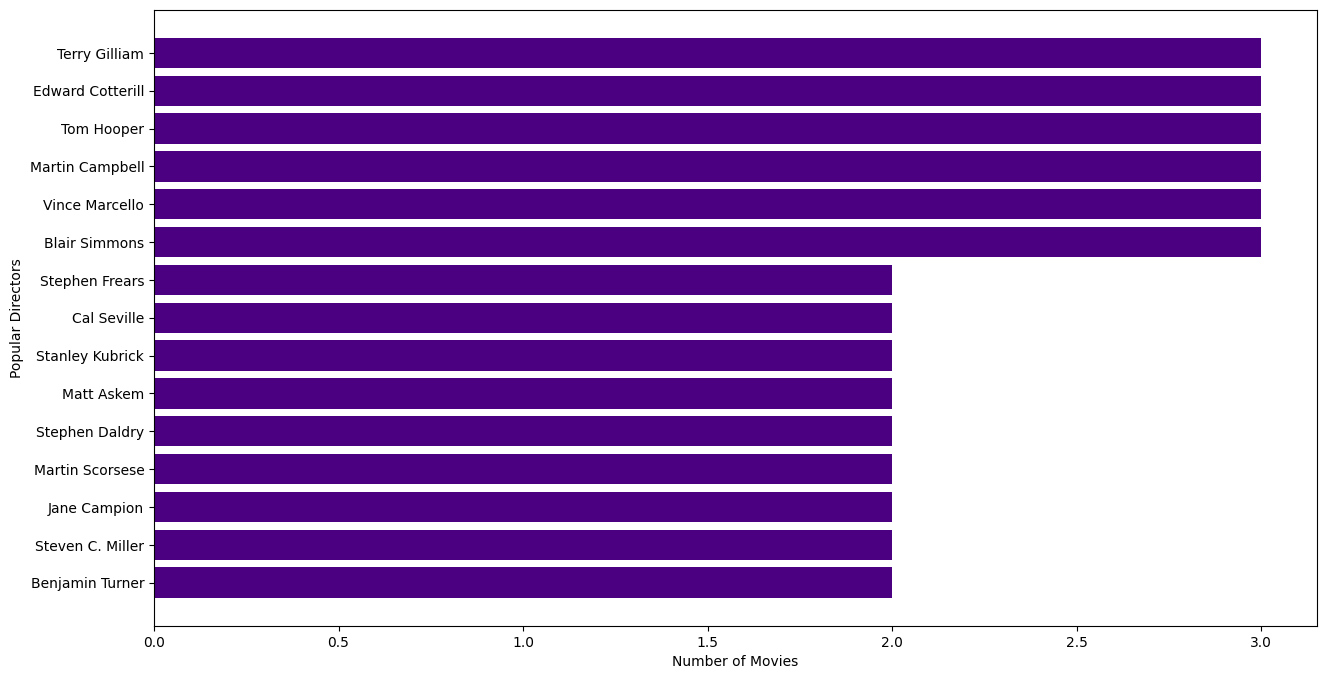

In [ ]:
df_directors=df_uk_movies.groupby(['director']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:15]
df_directors=df_directors[df_directors['director']!='Unknown Director']
plt.figure(figsize=(15,8))
plt.barh(df_directors[::-1]['director'], df_directors[::-1]['title'],color=['indigo'])
plt.xlabel('Number of Movies')
plt.ylabel('Popular Directors')
plt.show()

In [ ]:
df_directors['director'].values

array(['Terry Gilliam', 'Edward Cotterill', 'Tom Hooper',
       'Martin Campbell', 'Vince Marcello', 'Blair Simmons',
       'Stephen Frears', 'Cal Seville', 'Stanley Kubrick', 'Matt Askem',
       'Stephen Daldry', 'Martin Scorsese', 'Jane Campion',
       'Steven C. Miller', 'Benjamin Turner'], dtype=object)

**Popular directors across movies in UK:-**
<br>
'Joey So',
<br>
'Edward Cotterill'


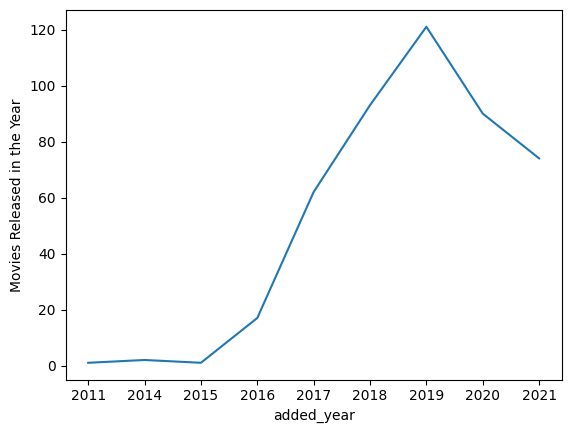

In [ ]:

df_uk_movies
df_year=df_uk_movies.groupby(['added_year']).agg({"title":"nunique"}).reset_index()
sns.lineplot(data=df_year, x='added_year', y='title')
plt.ylabel("Movies Released in the Year")
plt.xlabel("added_year")
plt.show()

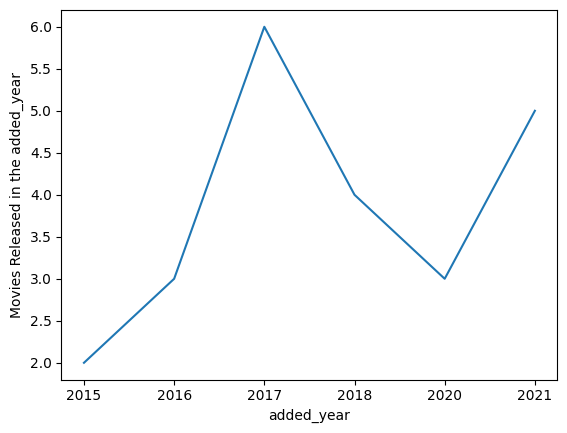

In [ ]:
df_year=df_uk_shows.groupby(['added_year']).agg({"title":"nunique"}).reset_index()
mask = df_year['added_year'] == 'NaT'
df_year = df_year[~mask]
sns.lineplot(data=df_year, x='added_year', y='title')
plt.ylabel("Movies Released in the added_year")
plt.xlabel("added_year")
plt.show()

In terms of TV Shows, UK saw a downfall in 2018 from 2017, then a great increase in 2019 but has been reducing since then.

In terms of Movies,the number of popular movies in UK increased till 2019, since then it's decreasing.

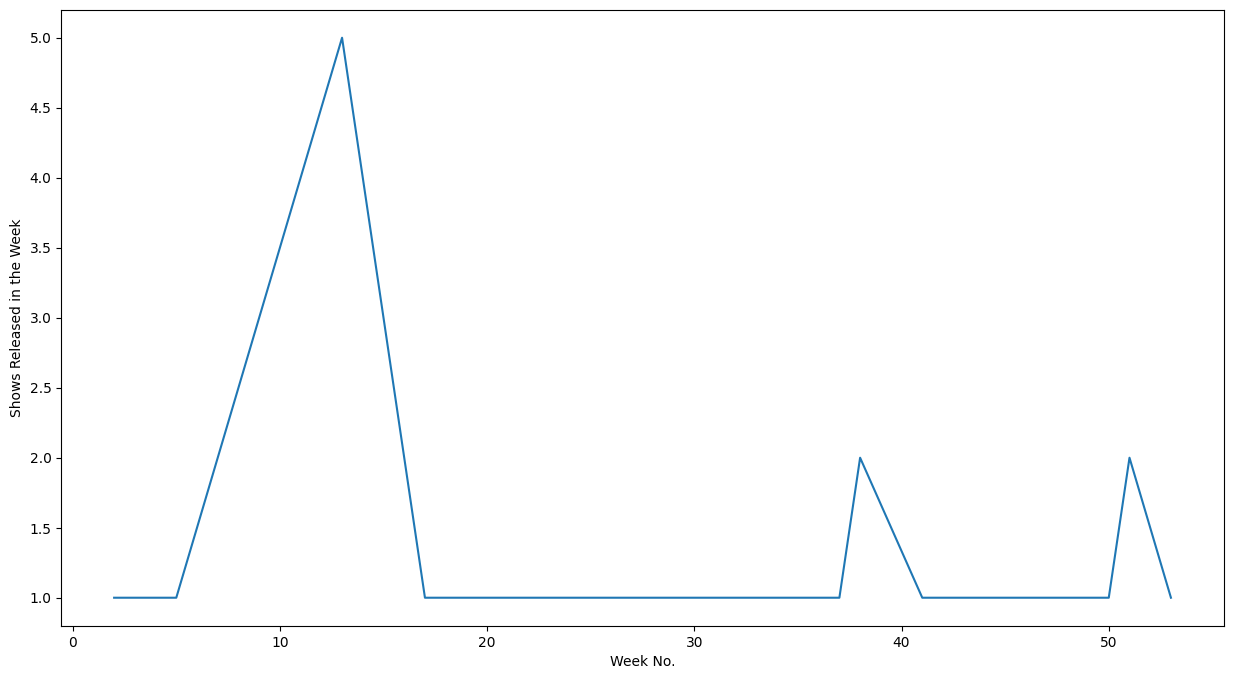

In [ ]:
df_week=df_uk_shows.groupby(['week']).agg({"title":"nunique"}).reset_index()
plt.figure(figsize=(15,8))
sns.lineplot(data=df_week, x='week', y='title')
plt.ylabel("Shows Released in the Week")
plt.xlabel("Week No.")
plt.show()

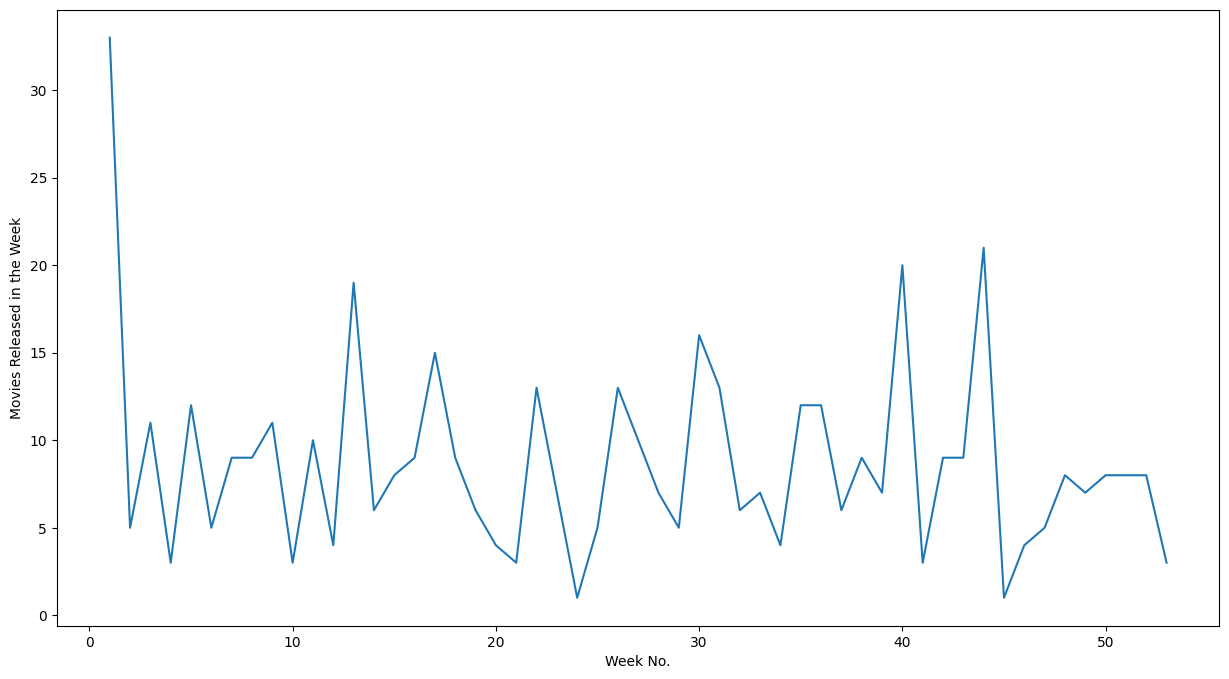

In [ ]:
df_week=df_uk_movies.groupby(['week']).agg({"title":"nunique"}).reset_index()
plt.figure(figsize=(15,8))
sns.lineplot(data=df_week, x='week', y='title')
plt.ylabel("Movies Released in the Week")
plt.xlabel("Week No.")
plt.show()

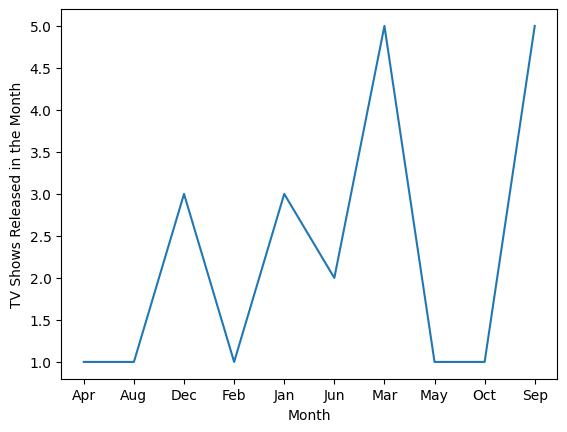

In [ ]:
df_month=df_uk_shows.groupby(['month']).agg({"title":"nunique"}).reset_index()
sns.lineplot(data=df_month, x='month', y='title')
plt.ylabel("TV Shows Released in the Month")
plt.xlabel("Month")
plt.show()

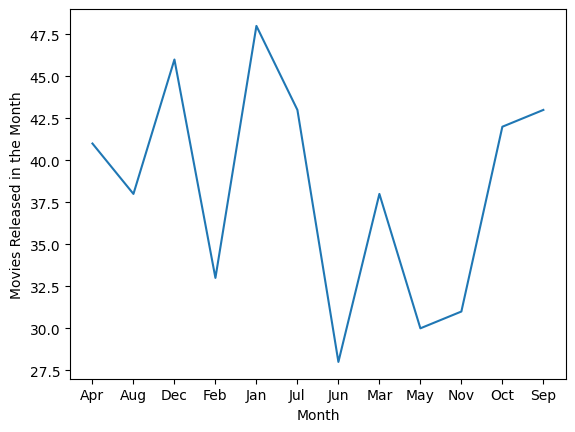

In [ ]:
df_month=df_uk_movies.groupby(['month']).agg({"title":"nunique"}).reset_index()
sns.lineplot(data=df_month, x='month', y='title')
plt.ylabel("Movies Released in the Month")
plt.xlabel("Month")
plt.show()

TV Shows are added in Netflix by a tremendous amount in March in UK

Movies are added in Netflix in India by a tremendous amount in first week/last month of current year and first month of next year

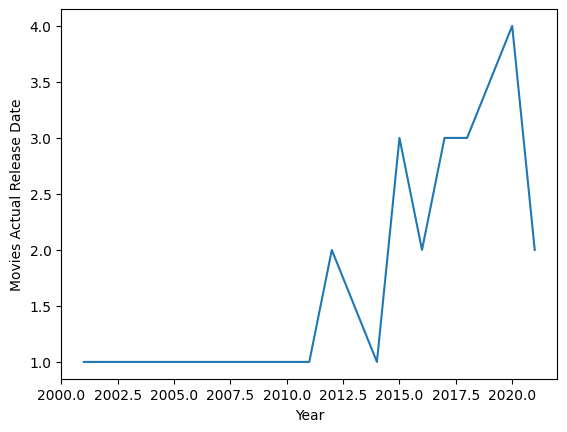

In [ ]:
df_release_year=df_uk_shows[df_uk_shows['release_year']>=1980].groupby(['release_year']).agg({"title":"nunique"}).reset_index()
sns.lineplot(data=df_release_year, x='release_year', y='title')
plt.ylabel("Movies Actual Release Date")
plt.xlabel("Year")
plt.show()

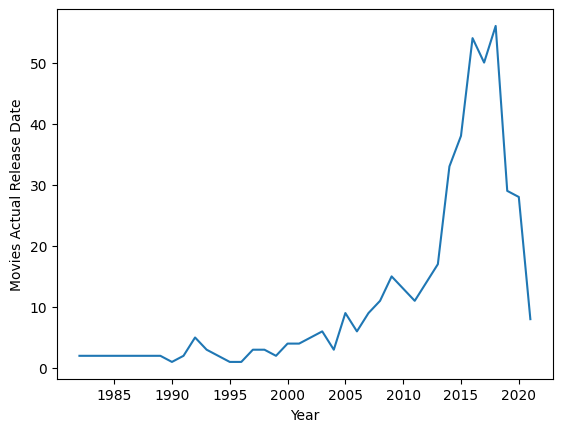

In [ ]:
df_release_year=df_uk_movies[df_uk_movies['release_year']>=1980].groupby(['release_year']).agg({"title":"nunique"}).reset_index()
sns.lineplot(data=df_release_year, x='release_year', y='title')
plt.ylabel("Movies Actual Release Date")
plt.xlabel("Year")
plt.show()

Same trend of reduction in movies and shows after 2020.


In [ ]:
# Analysing a combination of actors and directors
# df_uk_movies
df_uk_movies['Actor_Director_Combination'] = df_uk_movies.cast.str.cat(df_uk_movies['director'], sep=' and ')
df_uk_movies_subset=df_uk_movies[df_uk_movies['cast']!='Unknown Actor']
df_uk_movies_subset=df_uk_movies_subset[df_uk_movies_subset.director!='Unknown Director']
df_uk_movies_subset.head()

show_id   type    title      director                 cast         country  \
7      s8  Movie  Sankofa  Haile Gerima         Kofi Ghanaba  United Kingdom   
7      s8  Movie  Sankofa  Haile Gerima         Kofi Ghanaba  United Kingdom   
7      s8  Movie  Sankofa  Haile Gerima         Kofi Ghanaba  United Kingdom   
7      s8  Movie  Sankofa  Haile Gerima  Oyafunmike Ogunlano  United Kingdom   
7      s8  Movie  Sankofa  Haile Gerima  Oyafunmike Ogunlano  United Kingdom   

  date_added  release_year rating duration             listed_in  \
7 2021-09-24          1993  TV-MA  125 min                Dramas   
7 2021-09-24          1993  TV-MA  125 min    Independent Movies   
7 2021-09-24          1993  TV-MA  125 min  International Movies   
7 2021-09-24          1993  TV-MA  125 min                Dramas   
7 2021-09-24          1993  TV-MA  125 min    Independent Movies   

                                         description added_year  week month  \
7  On a photo shoot in Ghana, an American model s...       2021    38   Sep   
7  On a photo shoot in Ghana, an American model s...       2021    38   Sep   
7  On a photo shoot in Ghana, an American model s...       2021    38   Sep   
7  On a photo shoot in Ghana, an American model s...       2021    38   Sep   
7  On a photo shoot in Ghana, an American model s...       2021    38   Sep   

             Actor_Director_Combination  
7         Kofi Ghanaba and Haile Gerima  
7         Kofi Ghanaba and Haile Gerima  
7         Kofi Ghanaba and Haile Gerima  
7  Oyafunmike Ogunlano and Haile Gerima  
7  Oyafunmike Ogunlano and Haile Gerima

In [ ]:
df_uk_shows['Actor_Director_Combination'] = df_uk_shows.cast.str.cat(df_uk_shows.director, sep=' and ')
df_uk_shows_subset=df_uk_shows[df_uk_shows['cast']!='Unknown Actor']
df_uk_shows_subset=df_uk_shows_subset[df_uk_shows_subset.director!='Unknown Director']
df_uk_shows_subset.head()

show_id     type                          title         director  \
8      s9  TV Show  The Great British Baking Show  Andy Devonshire   
8      s9  TV Show  The Great British Baking Show  Andy Devonshire   
8      s9  TV Show  The Great British Baking Show  Andy Devonshire   
8      s9  TV Show  The Great British Baking Show  Andy Devonshire   
8      s9  TV Show  The Great British Baking Show  Andy Devonshire   

           cast         country date_added  release_year rating   duration  \
8  Mel Giedroyc  United Kingdom 2021-09-24          2021  TV-14  9 Seasons   
8  Mel Giedroyc  United Kingdom 2021-09-24          2021  TV-14  9 Seasons   
8   Sue Perkins  United Kingdom 2021-09-24          2021  TV-14  9 Seasons   
8   Sue Perkins  United Kingdom 2021-09-24          2021  TV-14  9 Seasons   
8    Mary Berry  United Kingdom 2021-09-24          2021  TV-14  9 Seasons   

          listed_in                                        description  \
8  British TV Shows  A talented batch of amateur bakers face off in...   
8        Reality TV  A talented batch of amateur bakers face off in...   
8  British TV Shows  A talented batch of amateur bakers face off in...   
8        Reality TV  A talented batch of amateur bakers face off in...   
8  British TV Shows  A talented batch of amateur bakers face off in...   

  added_year  week month        Actor_Director_Combination  
8       2021    38   Sep  Mel Giedroyc and Andy Devonshire  
8       2021    38   Sep  Mel Giedroyc and Andy Devonshire  
8       2021    38   Sep   Sue Perkins and Andy Devonshire  
8       2021    38   Sep   Sue Perkins and Andy Devonshire  
8       2021    38   Sep    Mary Berry and Andy Devonshire

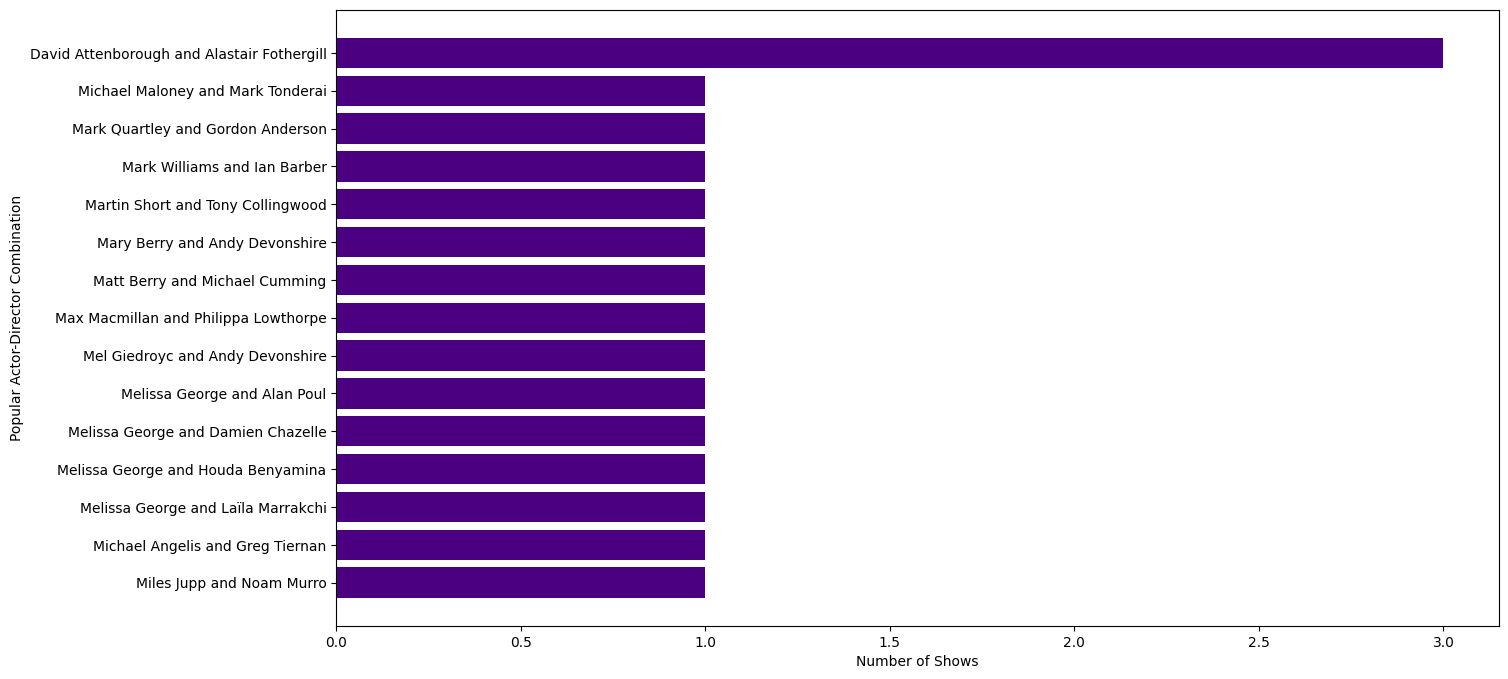

In [ ]:
df_actors_directors=df_uk_shows_subset.groupby(['Actor_Director_Combination']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:15]
plt.figure(figsize=(15,8))
plt.barh(df_actors_directors[::-1]['Actor_Director_Combination'], df_actors_directors[::-1]['title'],color=['indigo'])
plt.xlabel('Number of Shows')
plt.ylabel('Popular Actor-Director Combination')
plt.show()

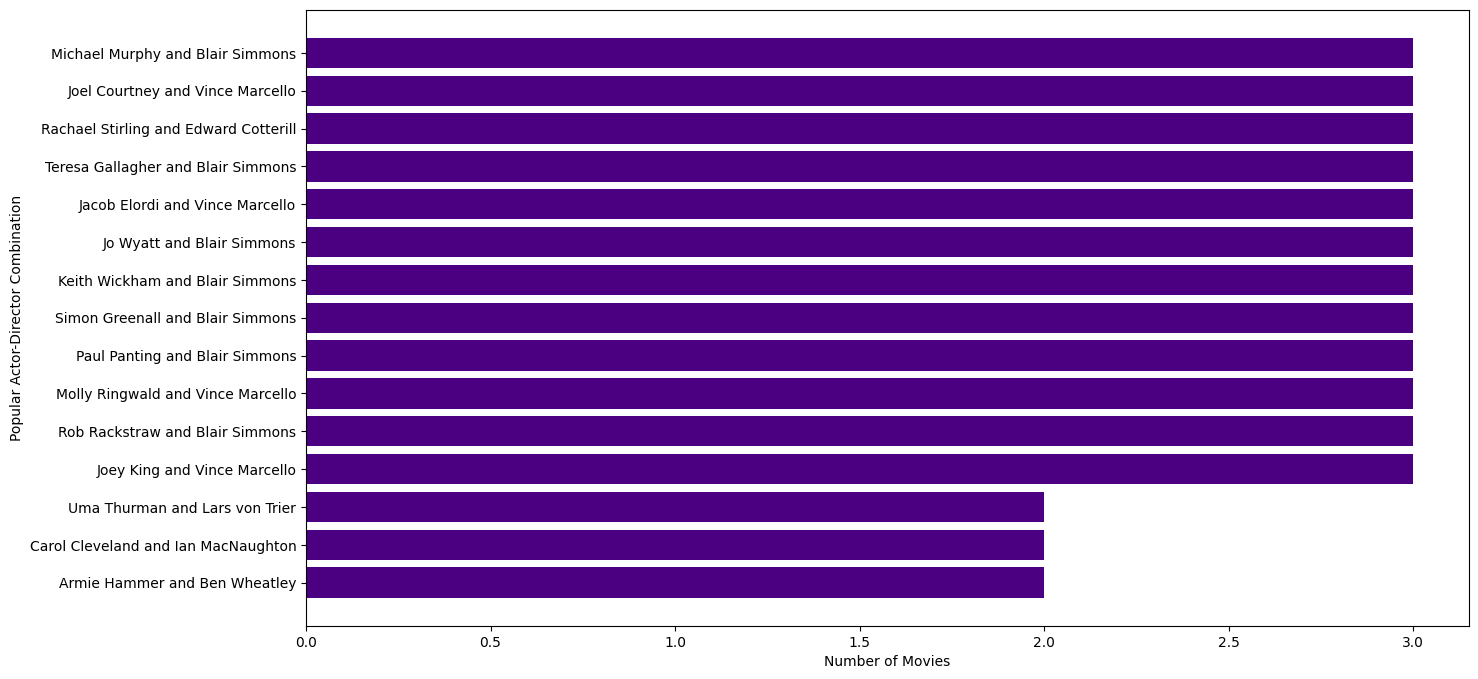

In [ ]:
df_actors_directors=df_uk_movies_subset.groupby(['Actor_Director_Combination']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:15]
plt.figure(figsize=(15,8))
plt.barh(df_actors_directors[::-1]['Actor_Director_Combination'], df_actors_directors[::-1]['title'],color=['indigo'])
plt.xlabel('Number of Movies')
plt.ylabel('Popular Actor-Director Combination')
plt.show()

In [ ]:
df_actors_directors['Actor_Director_Combination'].values

array(['Michael Murphy and Blair Simmons',
       'Joel Courtney and Vince Marcello',
       'Rachael Stirling and Edward Cotterill',
       'Teresa Gallagher and Blair Simmons',
       'Jacob Elordi and Vince Marcello', 'Jo Wyatt and Blair Simmons',
       'Keith Wickham and Blair Simmons',
       'Simon Greenall and Blair Simmons',
       'Paul Panting and Blair Simmons',
       'Molly Ringwald and Vince Marcello',
       'Rob Rackstraw and Blair Simmons', 'Joey King and Vince Marcello',
       'Uma Thurman and Lars von Trier',
       'Carol Cleveland and Ian MacNaughton',
       'Armie Hammer and Ben Wheatley'], dtype=object)

**The Most Popular Actor Director Combination in Movies Across UK are:-**

'Michael Murphy and Blair Simmons',
       
'Joel Courtney and Vince Marcello'

#### Univariate Analysis separately for shows in Japan
---

In [ ]:
df_japan_shows=df[df['country']=='Japan'][df[df['country']=='Japan']['type']=='TV Show']

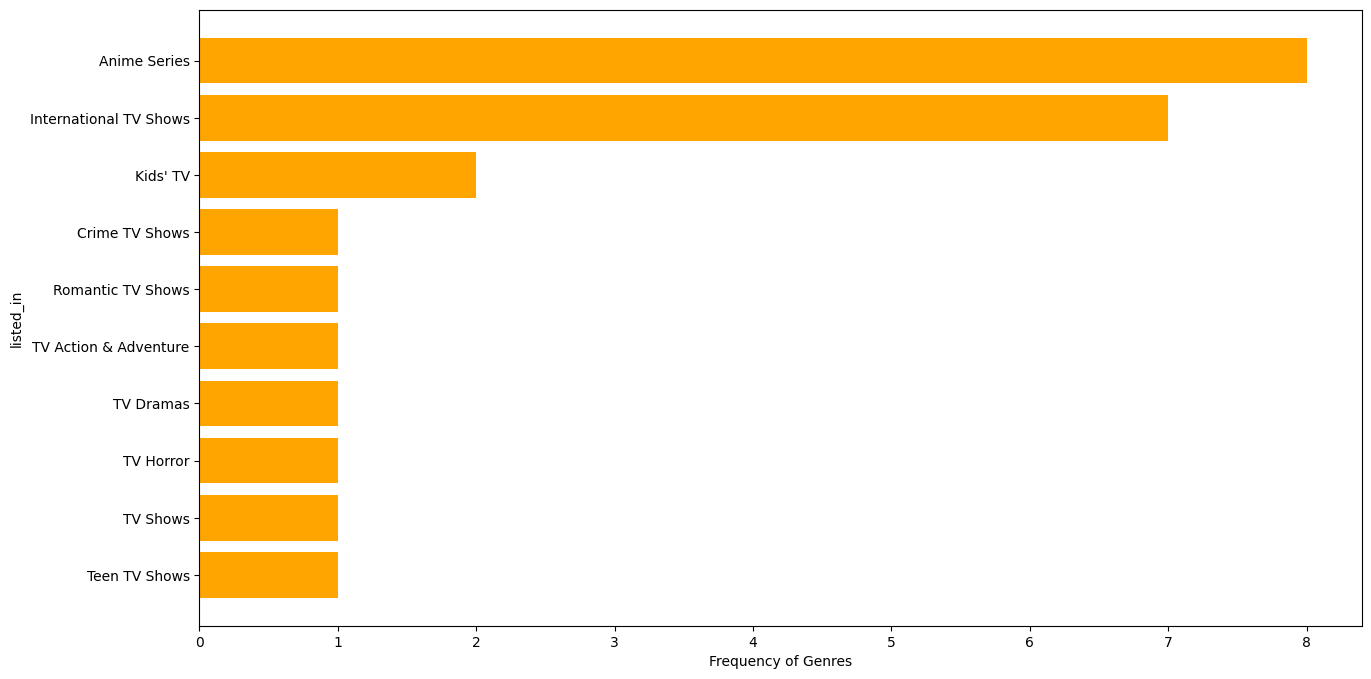

In [ ]:
df_genre=df_japan_shows.groupby(['listed_in']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:15]
plt.figure(figsize=(15,8))
plt.barh(df_genre[::-1]['listed_in'], df_genre[::-1]['title'],color=['orange'])
plt.xlabel('Frequency of Genres')
plt.ylabel('listed_in')
plt.show()

International TV Shows and Anime Genres are popular in TV Shows in Japan

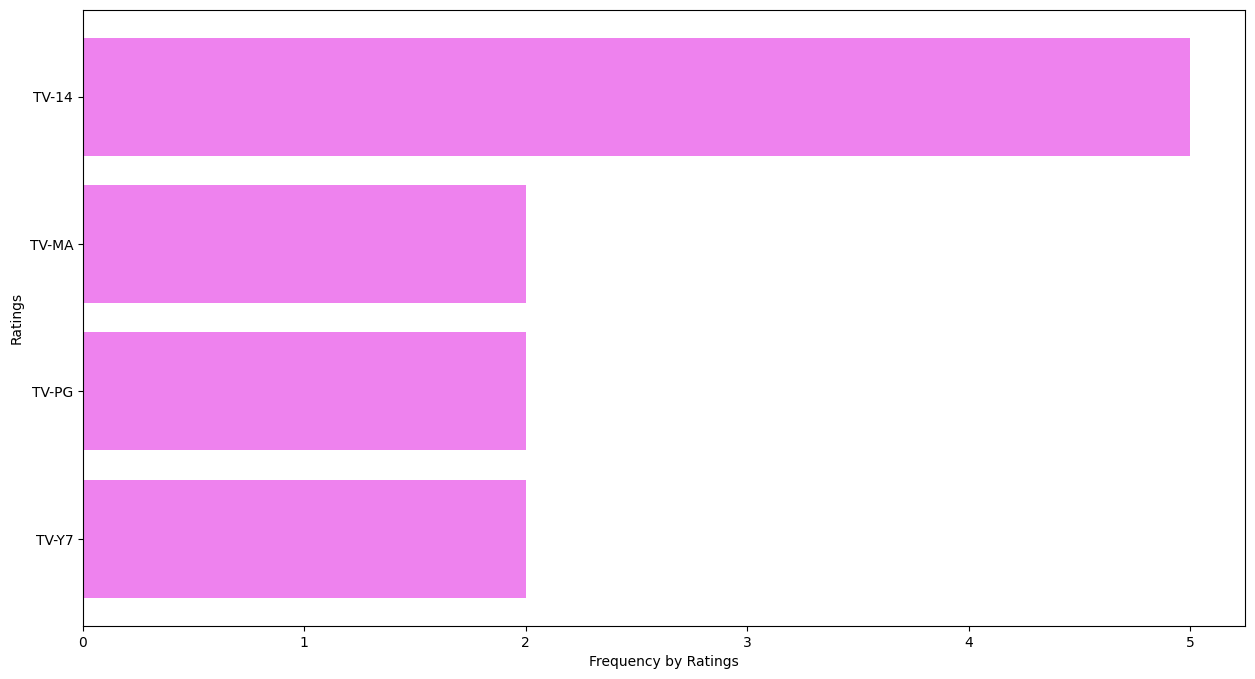

In [ ]:
df_rating=df_japan_shows.groupby(['rating']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:15]
plt.figure(figsize=(15,8))
plt.barh(df_rating[::-1]['rating'], df_rating[::-1]['title'],color=['violet'])
plt.xlabel('Frequency by Ratings')
plt.ylabel('Ratings')
plt.show()

So it seems plaussible to conclude that the popular ratings across Netflix


includes TV-14 Mature Audiences in TV Shows

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12539 (\N{KATAKANA MIDDLE DOT}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


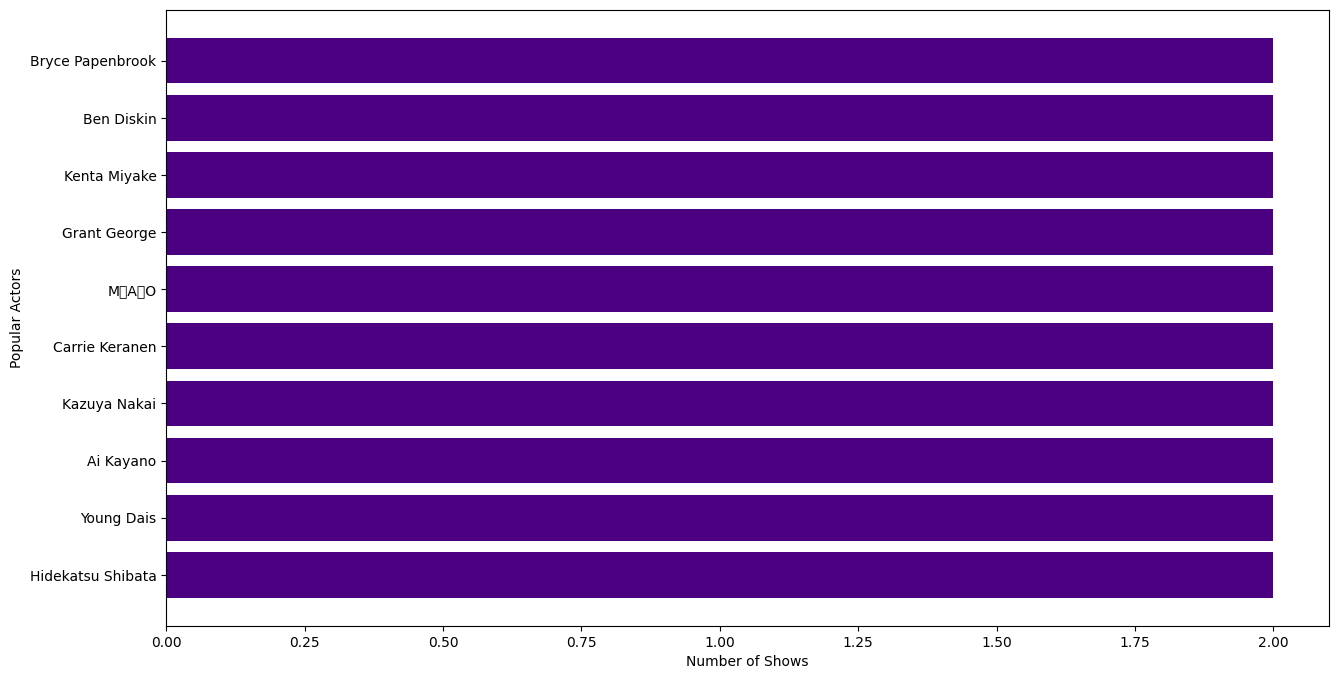

In [ ]:
df_actors=df_japan_shows.groupby(['cast']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:10]
df_actors=df_actors[df_actors['cast']!='Unknown Actor']
plt.figure(figsize=(15,8))
plt.barh(df_actors[::-1]['cast'], df_actors[::-1]['title'],color=['indigo'])
plt.xlabel('Number of Shows')
plt.ylabel('Popular Actors')
plt.show()

In [ ]:
df_actors['cast'].values

array(['Bryce Papenbrook', 'Ben Diskin', 'Kenta Miyake', 'Grant George',
       'M・A・O', 'Carrie Keranen', 'Kazuya Nakai', 'Ai Kayano',
       'Young Dais', 'Hidekatsu Shibata'], dtype=object)

**Popular Actors in TV Shows in Japan are:-**
<br>
'Takahiro Sakurai',
<br>
'Yuki Kaji',
<br>
'Daisuke Ono',
<br>
'Junichi Suwabe',
<br>
'Ai Kayano',
<br>
'Yuichi Nakamura',
<br>
'Yoshimasa Hosoya',
<br>
'Jun Fukuyama',
<br>
'Hiroshi Kamiya',
<br>
'Kana Hanazawa'

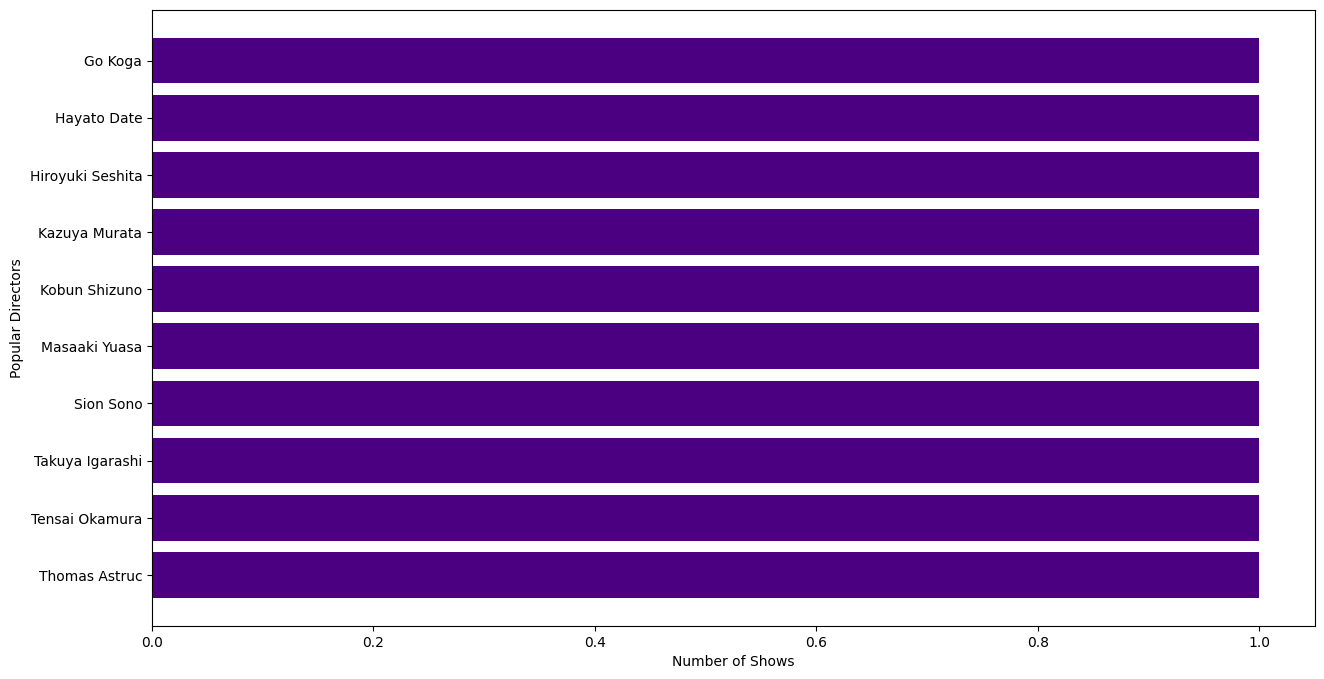

In [ ]:
df_directors=df_japan_shows.groupby(['director']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:10]
df_directors=df_directors[df_directors['director']!='Unknown Director']
plt.figure(figsize=(15,8))
plt.barh(df_directors[::-1]['director'], df_directors[::-1]['title'],color=['indigo'])
plt.xlabel('Number of Shows')
plt.ylabel('Popular Directors')
plt.show()

So it seems plaussible to conclude that the popular ratings across Netflix


includes TV-14 Mature Audiences in TV Shows

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12539 (\N{KATAKANA MIDDLE DOT}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


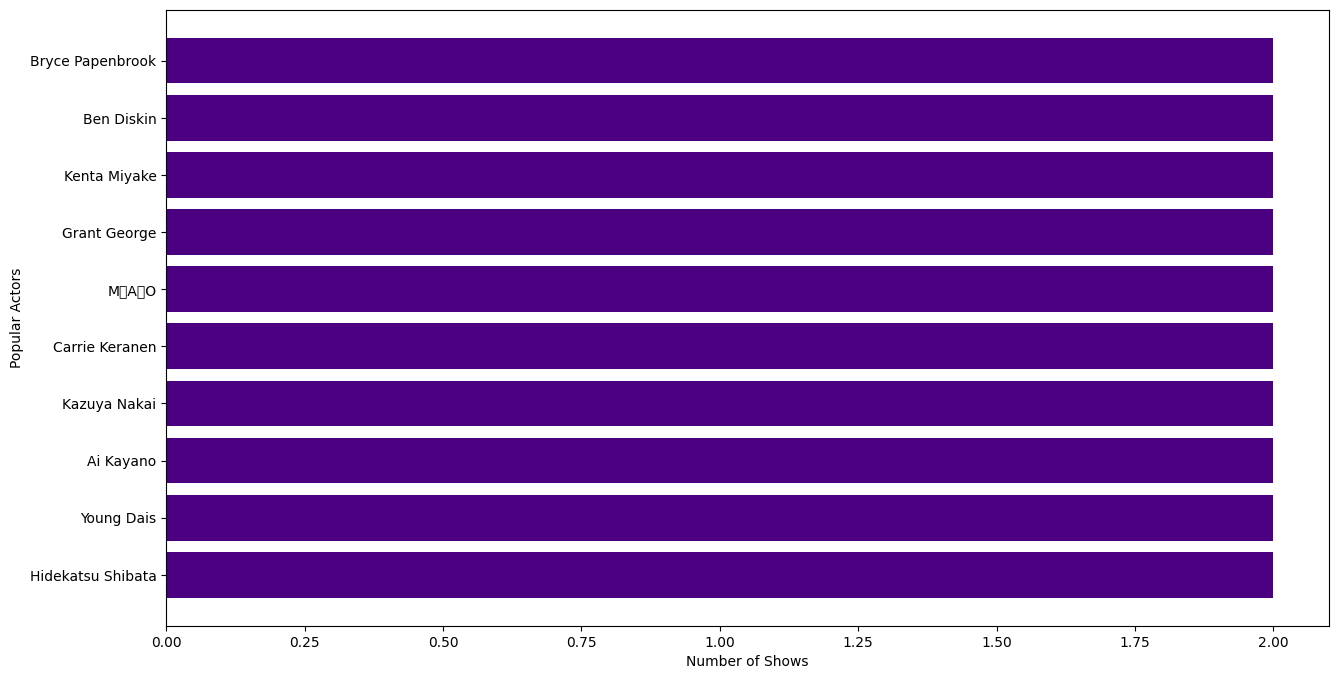

In [ ]:
df_actors=df_japan_shows.groupby(['cast']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:10]
df_actors=df_actors[df_actors['cast']!='Unknown Actor']
plt.figure(figsize=(15,8))
plt.barh(df_actors[::-1]['cast'], df_actors[::-1]['title'],color=['indigo'])
plt.xlabel('Number of Shows')
plt.ylabel('Popular Actors')
plt.show()

In [ ]:
df_actors['cast'].values

array(['Bryce Papenbrook', 'Ben Diskin', 'Kenta Miyake', 'Grant George',
       'M・A・O', 'Carrie Keranen', 'Kazuya Nakai', 'Ai Kayano',
       'Young Dais', 'Hidekatsu Shibata'], dtype=object)

**Popular Actors in TV Shows in Japan are:-**
<br>
'Takahiro Sakurai',
<br>
'Yuki Kaji',
<br>
'Daisuke Ono',
<br>
'Junichi Suwabe',
<br>
'Ai Kayano',
<br>
'Yuichi Nakamura',
<br>
'Yoshimasa Hosoya',
<br>
'Jun Fukuyama',
<br>
'Hiroshi Kamiya',
<br>
'Kana Hanazawa'

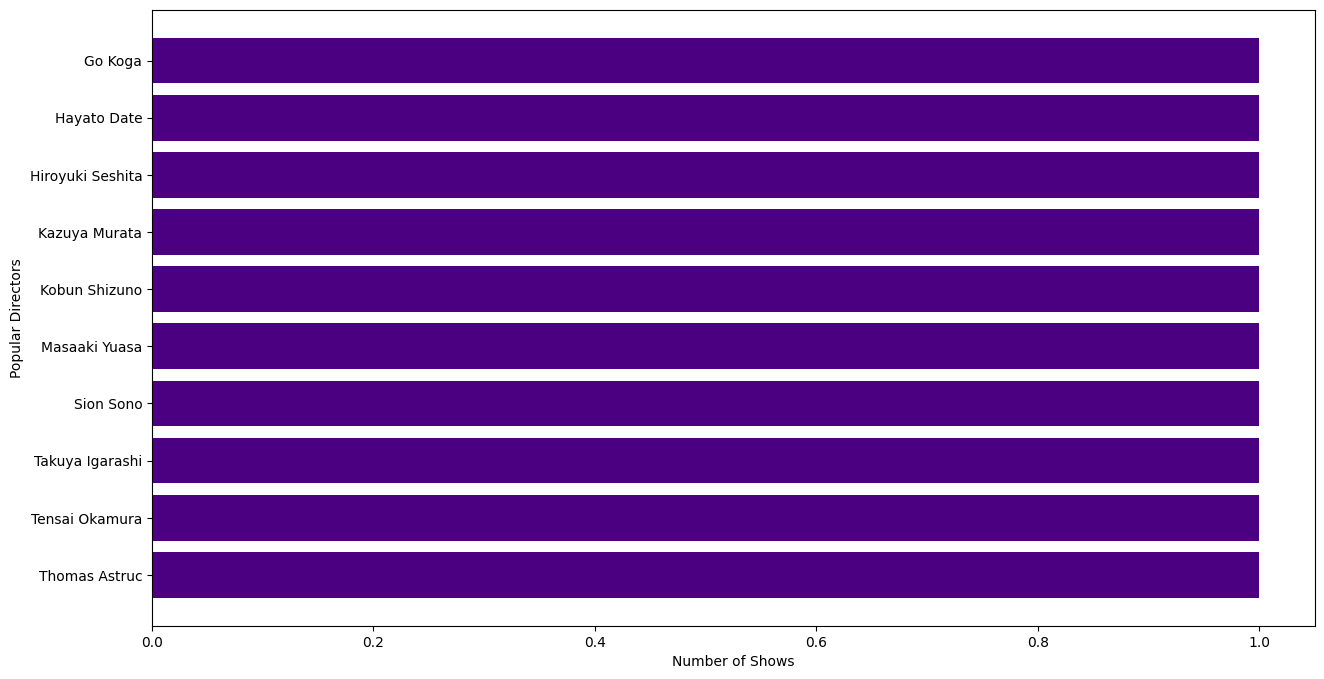

In [ ]:
df_directors=df_japan_shows.groupby(['director']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:10]
df_directors=df_directors[df_directors['director']!='Unknown Director']
plt.figure(figsize=(15,8))
plt.barh(df_directors[::-1]['director'], df_directors[::-1]['title'],color=['indigo'])
plt.xlabel('Number of Shows')
plt.ylabel('Popular Directors')
plt.show()

In [ ]:
df_directors['director'].values

array(['Go Koga', 'Hayato Date', 'Hiroyuki Seshita', 'Kazuya Murata',
       'Kobun Shizuno', 'Masaaki Yuasa', 'Sion Sono', 'Takuya Igarashi',
       'Tensai Okamura', 'Thomas Astruc'], dtype=object)

All Directors are one time directors only

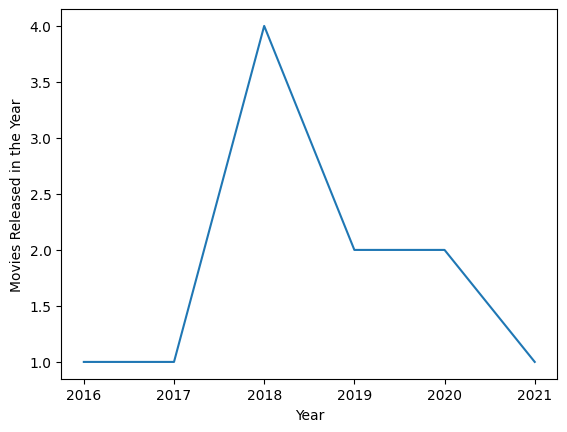

In [ ]:
df_year=df_japan_shows.groupby(['added_year']).agg({"title":"nunique"}).reset_index()
mask = df_year['added_year']=='NaT'
df_year = df_year[~mask]
sns.lineplot(data=df_year, x='added_year', y='title')
plt.ylabel("Movies Released in the Year")
plt.xlabel("Year")
plt.show()

In Japan, TV Shows have diminished in 2017 from 2016 and then increased till 2020 after which it has reduced in 2021.

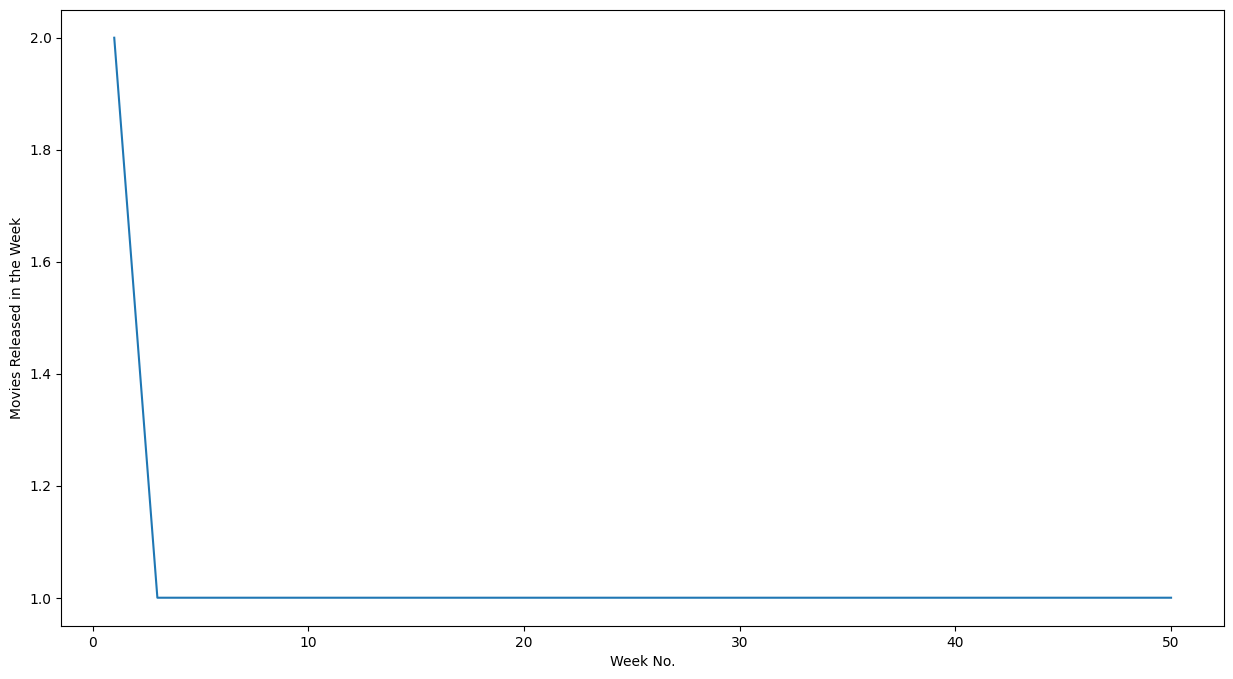

In [ ]:
df_week=df_japan_shows.groupby(['week']).agg({"title":"nunique"}).reset_index()
plt.figure(figsize=(15,8))
sns.lineplot(data=df_week, x='week', y='title')
plt.ylabel("Movies Released in the Week")
plt.xlabel("Week No.")
plt.show()

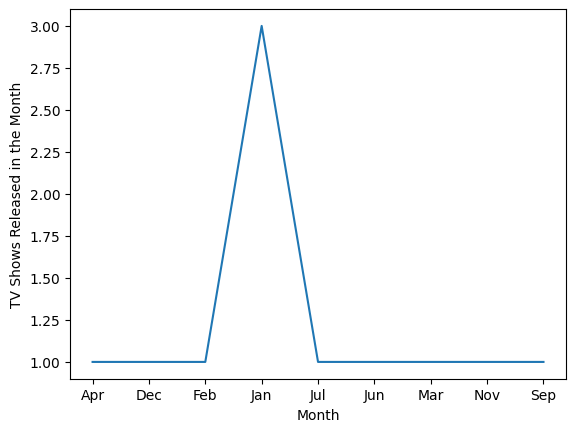

In [ ]:
df_month=df_japan_shows.groupby(['month']).agg({"title":"nunique"}).reset_index()
sns.lineplot(data=df_month, x='month', y='title')
plt.ylabel("TV Shows Released in the Month")
plt.xlabel("Month")
plt.show()

TV Shows are added in Netflix by significant numbers in April and January in Japan

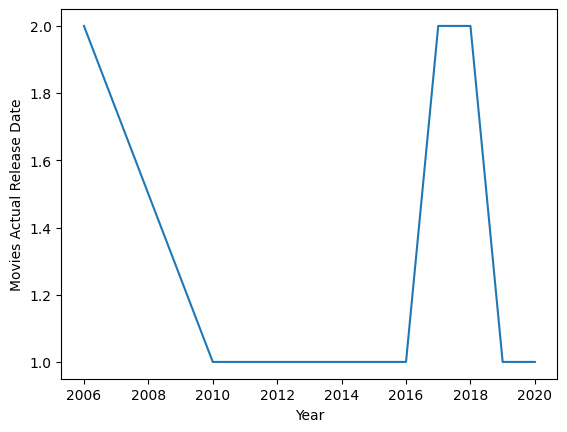

In [ ]:
df_release_year=df_japan_shows[df_japan_shows['release_year']>=1980].groupby(['release_year']).agg({"title":"nunique"}).reset_index()
sns.lineplot(data=df_release_year, x='release_year', y='title')
plt.ylabel("Movies Actual Release Date")
plt.xlabel("Year")
plt.show()

Reduction in TV Shows after 2019 in Japan

#### Univariate Analysis separately for shows in South Korea
---

---



In [ ]:
#Analyzing South Korea for both shows and movies
df_sk_shows=df[df['country']=='South Korea'][df[df['country']=='South Korea']['type']=='TV Show']

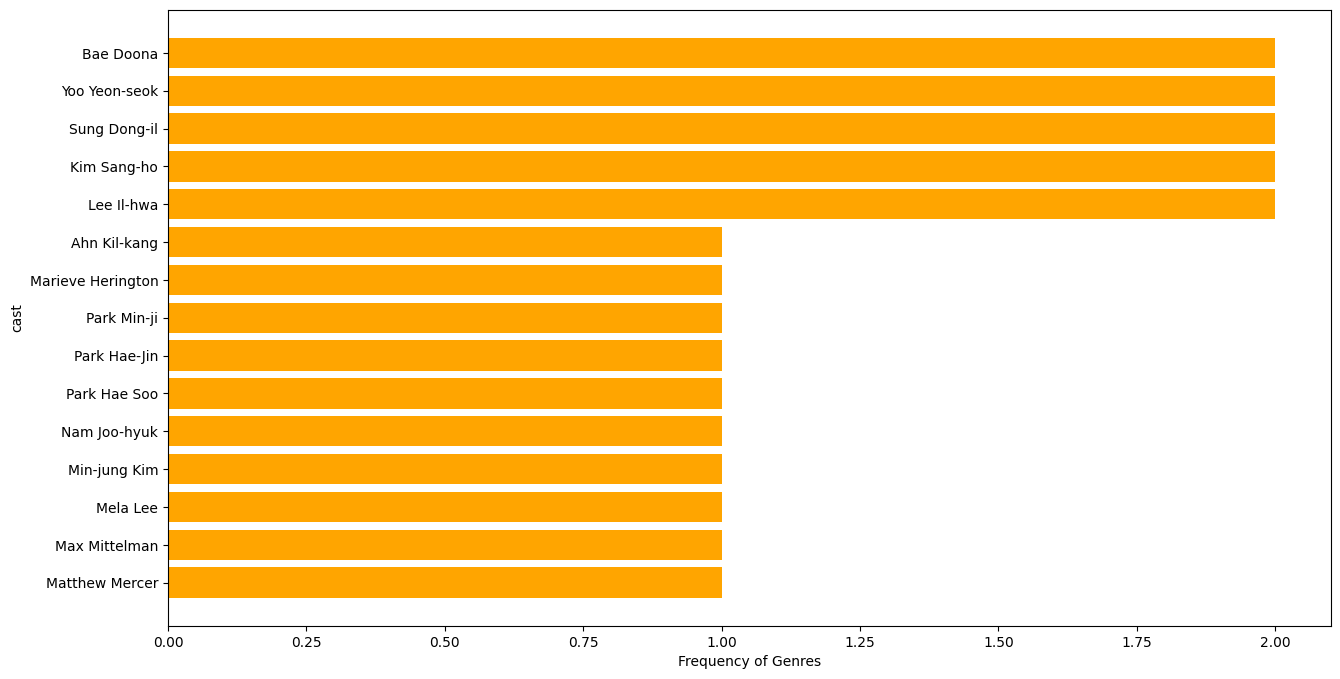

In [ ]:
df_genre=df_sk_shows.groupby(['cast']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:15]
plt.figure(figsize=(15,8))
plt.barh(df_genre[::-1]['cast'], df_genre[::-1]['title'],color=['orange'])
plt.xlabel('Frequency of Genres')
plt.ylabel('cast')
plt.show()

International TV Shows,Romantic TV Shows,Drama,Crime and Comedy Genres are popular in TV Shows in S.Korea.

Only S.Korea has Romance as a top 3 favorable genre which depicts an inclination of their audience

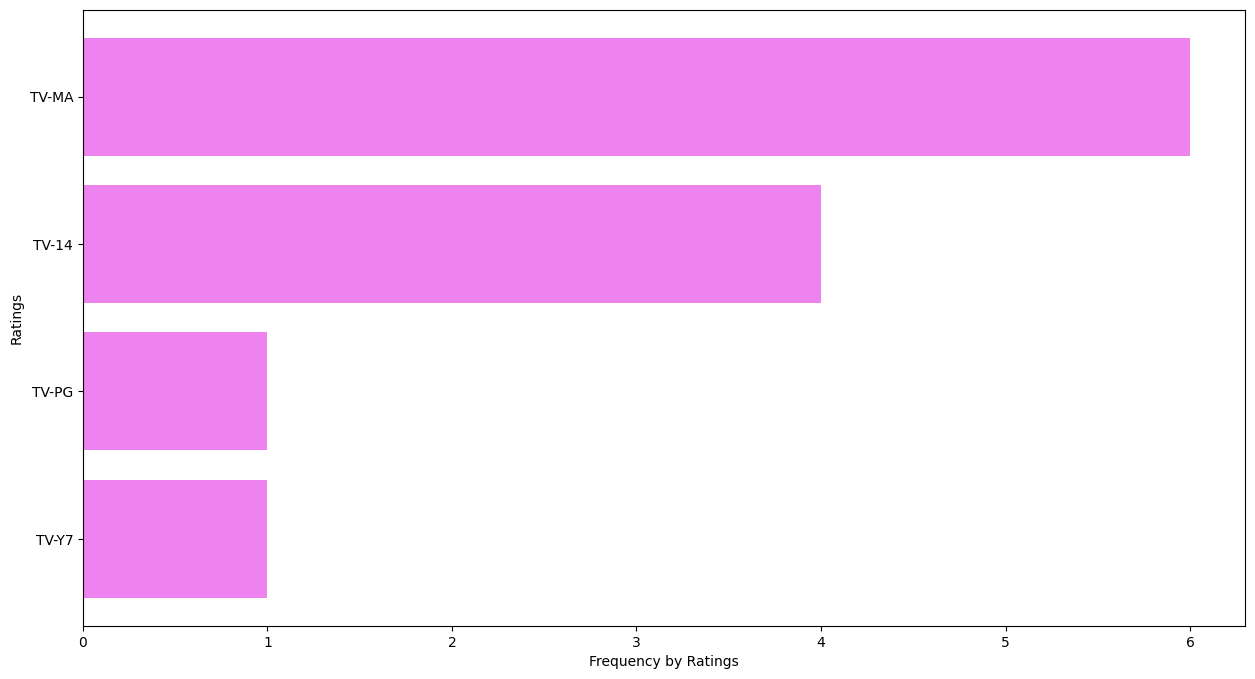

In [ ]:
df_rating=df_sk_shows.groupby(['rating']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:15]
plt.figure(figsize=(15,8))
plt.barh(df_rating[::-1]['rating'], df_rating[::-1]['title'],color=['violet'])
plt.xlabel('Frequency by Ratings')
plt.ylabel('Ratings')
plt.show()

So it seems to conclude that the popular ratings across Netflix includes TV-14 and Mature Audiences in TV Shows

**Recommendations**

1) The most popular Genres across the countries and in both TV Shows and Movies are Drama, Comedy and International TV Shows/Movies, so content aligning to that is recommended.


2)Add TV Shows in July/August and Movies in last week of the year/first month of the next year.


3)For USA audience 80-120 mins is the recommended length for movies and Kids TV Shows are also popular along with the genres in first point, hence recommended.


4)For UK audience, recommended length for movies is same as that of USA (80-120 mins)


5)The target audience in USA and India is recommended to be 14+ and above ratings while for UK, its recommended to be completely Mature/R content .


6)Add movies for Indian Audience, it has been declining since 2018.


7)Anime Genre for Japan and Romantic Genre in TV Shows for South Korean audiences is recommended.


8) While creating content, take into consideration the popular actors/directors for that country. Also take into account the director-actor combination which is highly recommended.
